# Saudi Arabia Used Cars

## Business and Data Understanding

**Konteks Bisnis**
Dataset ini berasal dari pasar mobil bekas di Arab Saudi, dikumpulkan dari situs syarah.com — sebuah platform jual beli kendaraan.

Analisis pasar mobil bekas di Arab Saudi, yang dapat digunakan oleh penjual, pembeli, platform online, atau analis pasar untuk memahami tren harga, preferensi konsumen, dan faktor-faktor yang memengaruhi harga jual kendaraan bekas.

Stakeholder:
- Platform jual beli mobil online
- Pembeli dan penjual individu

**Data Understanding**

Data ini terdiri dari 5624 baris, satu baris merepresentasikan satu unit mobil bekas yang ditawarkan untuk dijual. Featurenya mencakup:

| **Nama Kolom**    | **Deskripsi**                                      | **Tipe Data**        |
|-------------------|----------------------------------------------------|----------------------|
| **Type**          | Tipe mobil (kategori)                              | string               |
| **Region**        | Wilayah tempat mobil dijual (kategori)            | string               |
| **Make**          | Merek mobil (kategori)                             | string               |
| **Gear_Type**     | Jenis transmisi (otomatis/manual) (kategori)      | string               |
| **Origin**        | Asal mobil (kategori)                              | string               |
| **Options**       | Fitur tambahan (kategori)                          | string               |
| **Year**          | Tahun pembuatan mobil (numerikal)                 | integer              |
| **Engine_Size**   | Ukuran mesin (dalam liter, contoh: 2.0)           | float                |
| **Mileage**       | Jarak tempuh mobil (dalam mile)                   | integer              |
| **Negotiable**    | Menunjukkan apakah harga masih bisa dinegosiasikan (True/False) | boolean              |
| **Price**         | Harga mobil (numerikal)                           | integer              |

## Problem Statement

### Penjelasan Masalah

Pasar mobil bekas di Arab Saudi berkembang pesat, dengan ribuan unit mobil bekas ditawarkan secara online melalui platform seperti syarah.com. Namun, harga mobil bekas sangat bervariasi meskipun merek, tipe, atau tahun produksi terlihat serupa. Hal ini menimbulkan ketidakpastian bagi pembeli dan penjual dalam menilai apakah harga yang ditawarkan sudah wajar atau belum.

Tanpa adanya acuan yang jelas, pembeli berisiko membayar terlalu mahal, sementara penjual bisa menetapkan harga yang terlalu rendah dari nilai pasarnya. Oleh karena itu, penting untuk mengidentifikasi faktor-faktor yang benar-benar memengaruhi harga mobil bekas dan mengembangkan model prediktif yang mampu menilai harga pasar secara adil dan objektif.

### Konteks Bisnis & Statement Permasalahan

**Konteks Bisnis**

Dataset ini berisi 5624 data mobil bekas yang ditawarkan untuk dijual di Arab Saudi.

Informasi penting mencakup merek, tahun, transmisi, tipe, wilayah penjualan, kondisi mobil (mileage), opsi tambahan, ukuran mesin, dan harga.

Platform online seperti syarah.com, dealer mobil, dan penjual individu perlu wawasan data-driven agar dapat menetapkan harga mobil bekas secara tepat dan kompetitif.

***Statement Permasalahan**

Meskipun banyak data mobil bekas tersedia secara online, tidak ada cara otomatis untuk menilai apakah harga mobil bekas sudah sesuai dengan nilai pasar. Platform jual-beli, penjual, dan pembeli membutuhkan sistem berbasis data yang dapat mengidentifikasi faktor utama yang memengaruhi harga, serta memprediksi harga pasar yang adil berdasarkan karakteristik mobil.

### Definisi Permasalahan (Problem Definition)

Pertanyaan utama:

Apa saja fitur (variabel) yang paling signifikan dalam menentukan harga mobil bekas di Arab Saudi, dan bagaimana membangun model prediksi harga yang akurat untuk digunakan sebagai referensi nilai pasar?

Sub-permasalahan yang harus dijawab:
- Feature apa saja yang memiliki korelasi paling kuat dengan harga?

- Bagaimana hubungan antara harga dengan masing-masing feature?

- Apakah model regresi atau machine learning dapat digunakan untuk memprediksi harga dengan error yang rendah?


In [97]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, StackingRegressor, VotingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

# metric
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, mean_absolute_percentage_error

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## Load Dataset

In [98]:
df = pd.read_csv('data_saudi_used_cars.csv')

In [99]:
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
0,Corolla,Abha,Toyota,Manual,Saudi,Standard,2013,1.4,421000,True,0
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
4,FJ,Riyadh,Toyota,Automatic,Saudi,Full,2020,4.0,49000,True,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5624 entries, 0 to 5623
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         5624 non-null   object 
 1   Region       5624 non-null   object 
 2   Make         5624 non-null   object 
 3   Gear_Type    5624 non-null   object 
 4   Origin       5624 non-null   object 
 5   Options      5624 non-null   object 
 6   Year         5624 non-null   int64  
 7   Engine_Size  5624 non-null   float64
 8   Mileage      5624 non-null   int64  
 9   Negotiable   5624 non-null   bool   
 10  Price        5624 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 445.0+ KB


In [101]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5624.000000,5624.000000,5.624000e+03,5624.000000
mean,2014.101885,3.295430,1.509234e+05,53074.058144
std,5.791606,1.515108,3.828360e+05,70155.340614
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,72932.500000
max,2022.000000,9.000000,2.000000e+07,850000.000000


In [102]:
df.describe(include=object)

,Type,Region,Make,Gear_Type,Origin,Options
count,5624,5624,5624,5624,5624,5624
unique,347,27,58,2,4,3
top,Land Cruiser,Riyadh,Toyota,Automatic,Saudi,Full
freq,269,2272,1431,4875,4188,2233


In [103]:
df[df['Negotiable']==True].count()

Type           1796
Region         1796
Make           1796
Gear_Type      1796
Origin         1796
Options        1796
Year           1796
Engine_Size    1796
Mileage        1796
Negotiable     1796
Price          1796
dtype: int64

terdapat 1796 baris/mobil yang bisa dinegosiasikan

In [104]:
df[df['Price'] == 0].count()

Type           1797
Region         1797
Make           1797
Gear_Type      1797
Origin         1797
Options        1797
Year           1797
Engine_Size    1797
Mileage        1797
Negotiable     1797
Price          1797
dtype: int64

terdapat 1797 baris/mobil yang terdata Price = 0

## Data Cleaning

In [105]:
df.isna().sum()

Type           0
Region         0
Make           0
Gear_Type      0
Origin         0
Options        0
Year           0
Engine_Size    0
Mileage        0
Negotiable     0
Price          0
dtype: int64

insight: tidak terdapat data yang kosong atau null

In [106]:
df.duplicated().sum()

4

Insight: terdapat 4 baris yang bernilai duplicated, oleh karena itu yang duplicated akan didrop

In [107]:
df = df.drop_duplicates()

In [108]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,5620.000000,5620.000000,5.620000e+03,5620.000000
mean,2014.100356,3.296299,1.509222e+05,53086.404448
std,5.793003,1.515253,3.829633e+05,70175.153207
min,1963.000000,1.000000,1.000000e+02,0.000000
25%,2012.000000,2.000000,3.800000e+04,0.000000
50%,2016.000000,3.000000,1.030000e+05,36500.000000
75%,2018.000000,4.500000,1.960000e+05,73000.000000
max,2022.000000,9.000000,2.000000e+07,850000.000000


In [109]:
(df['Price'] == 0).sum()

1796

data yang memiliki Price = 0 akan didrop, karena kita tidak mengetahui berapa harga aktual dari mobil tersebut

In [110]:
df = df.drop(df[df['Price'] == 0].index)

In [111]:
df.describe()

,Year,Engine_Size,Mileage,Price
count,3824.000000,3824.000000,3.824000e+03,3824.000000
mean,2014.851203,3.181119,1.426211e+05,78019.245031
std,5.110916,1.458832,3.783942e+05,72748.182183
min,1963.000000,1.000000,1.000000e+02,1.000000
25%,2013.000000,2.000000,4.800000e+04,35000.000000
50%,2016.000000,2.700000,1.030000e+05,58000.000000
75%,2018.000000,4.000000,1.830000e+05,94250.000000
max,2021.000000,9.000000,2.000000e+07,850000.000000


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3824 entries, 1 to 5622
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Type         3824 non-null   object 
 1   Region       3824 non-null   object 
 2   Make         3824 non-null   object 
 3   Gear_Type    3824 non-null   object 
 4   Origin       3824 non-null   object 
 5   Options      3824 non-null   object 
 6   Year         3824 non-null   int64  
 7   Engine_Size  3824 non-null   float64
 8   Mileage      3824 non-null   int64  
 9   Negotiable   3824 non-null   bool   
 10  Price        3824 non-null   int64  
dtypes: bool(1), float64(1), int64(3), object(6)
memory usage: 332.4+ KB


## EDA

In [113]:
df.sort_values(by='Mileage').tail()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
4548,Tahoe,Riyadh,Chevrolet,Automatic,Saudi,Semi Full,2008,5.7,3300000,False,27000
1412,Trailblazer,Jeddah,Chevrolet,Automatic,Other,Full,2004,5.3,3500000,False,10000
4193,Innova,Riyadh,Toyota,Manual,Saudi,Standard,2013,2.7,3640000,False,30000
572,Camry,Yanbu,Toyota,Automatic,Other,Full,1998,2.5,4500000,False,15000
3403,Optra,Riyadh,Chevrolet,Manual,Other,Semi Full,2009,1.6,20000000,False,9000


In [114]:
df.head()

,Type,Region,Make,Gear_Type,Origin,Options,Year,Engine_Size,Mileage,Negotiable,Price
1,Yukon,Riyadh,GMC,Automatic,Saudi,Full,2014,8.0,80000,False,120000
2,Range Rover,Riyadh,Land Rover,Automatic,Gulf Arabic,Full,2015,5.0,140000,False,260000
3,Optima,Hafar Al-Batin,Kia,Automatic,Saudi,Semi Full,2015,2.4,220000,False,42000
5,CX3,Abha,Mazda,Automatic,Saudi,Semi Full,2019,2.0,25000,False,58000
6,Cayenne S,Riyadh,Porsche,Automatic,Saudi,Full,2012,4.8,189000,False,85000


### Price

<Axes: xlabel='Price', ylabel='Count'>

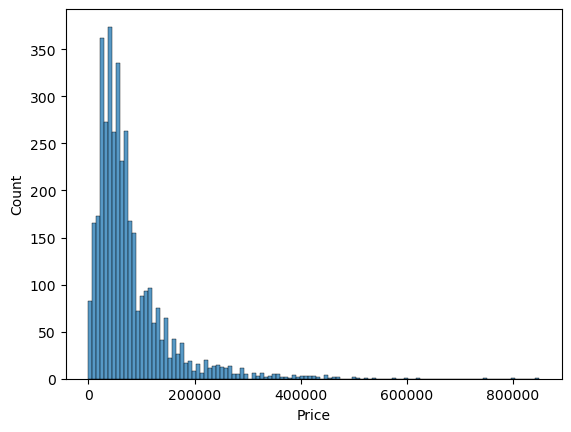

In [115]:
sns.histplot(data=df['Price'])

- Persebaran data Price menunjukkan Right-Skew
- Dari data di atas menunjukkan juga bahwa banyak data untuk mobil yang harganya di bawah 200000

### Type

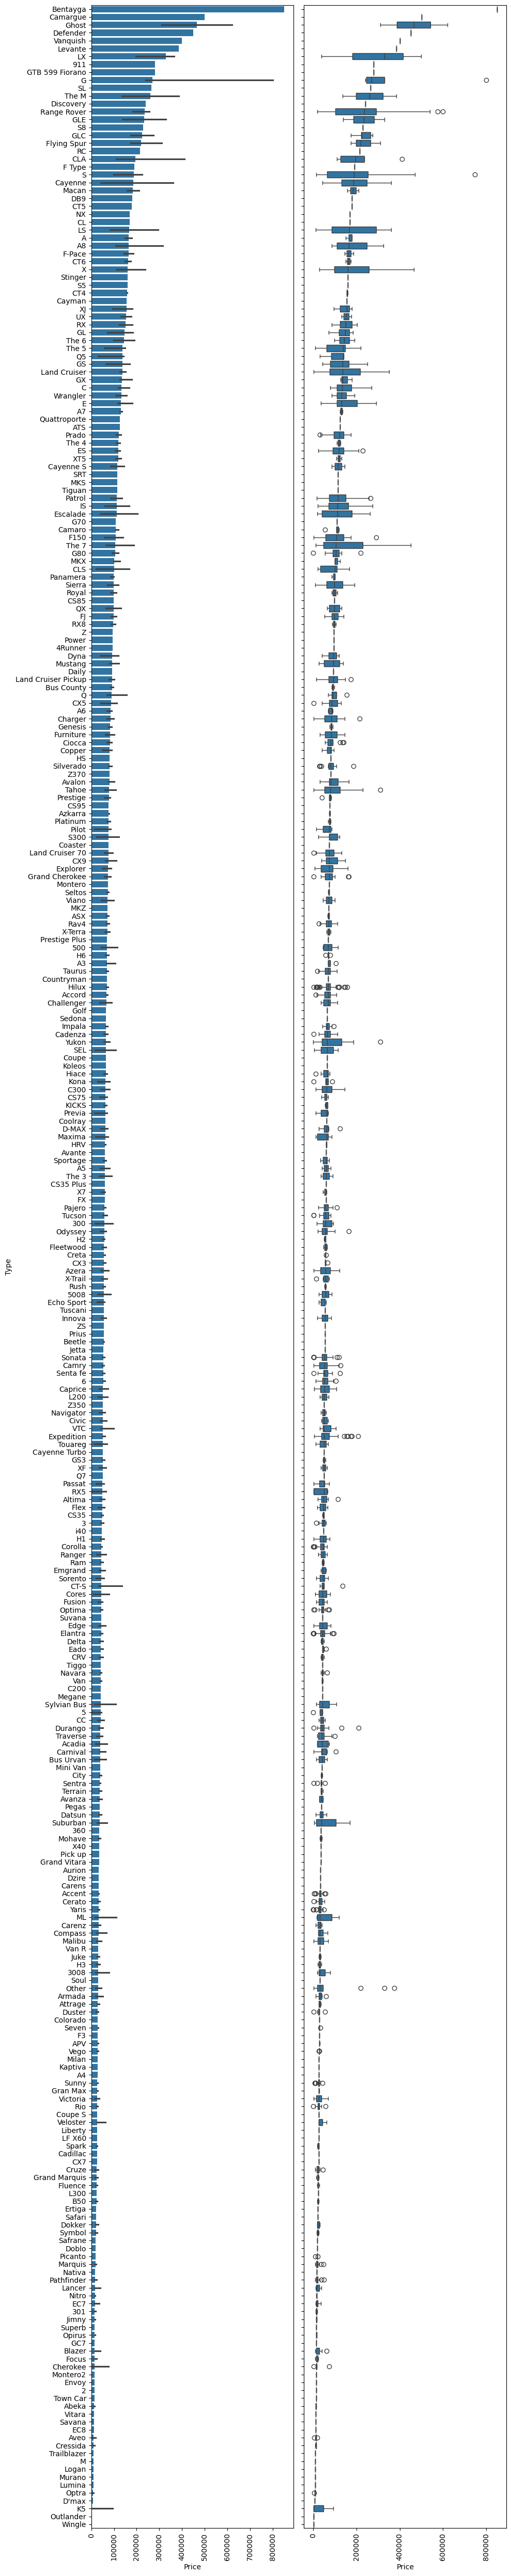

In [116]:
# Urutan kategori 'Type' berdasarkan median 'Price'
order = df.groupby('Type')['Price'].median().sort_values(ascending=False).index

# Membuat 2 subplot berdampingan
fig, axes = plt.subplots(ncols=2, figsize=(10, 50), sharey=True)

# Barplot di kiri
sns.barplot(data=df, x='Price', y='Type', estimator='median', order=order, ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

# Boxplot di kanan
sns.boxplot(data=df, x='Price', y='Type', order=order, ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

# Supaya layout rapi
plt.tight_layout()
plt.show()

- Bentayga menjadi Type mobil dengan nilai tengah harga jual termahal, dan juga memiliki harga jual termahal.
- Box IQR Bentayga terlihat sangat sempit, bisa jadi dikarenakan datanya sangat sedikit.

In [117]:
(df['Type']=='Bentayga').sum()

1

Hanya terdapat 1 mobil dengan Type Bentayga

### Region

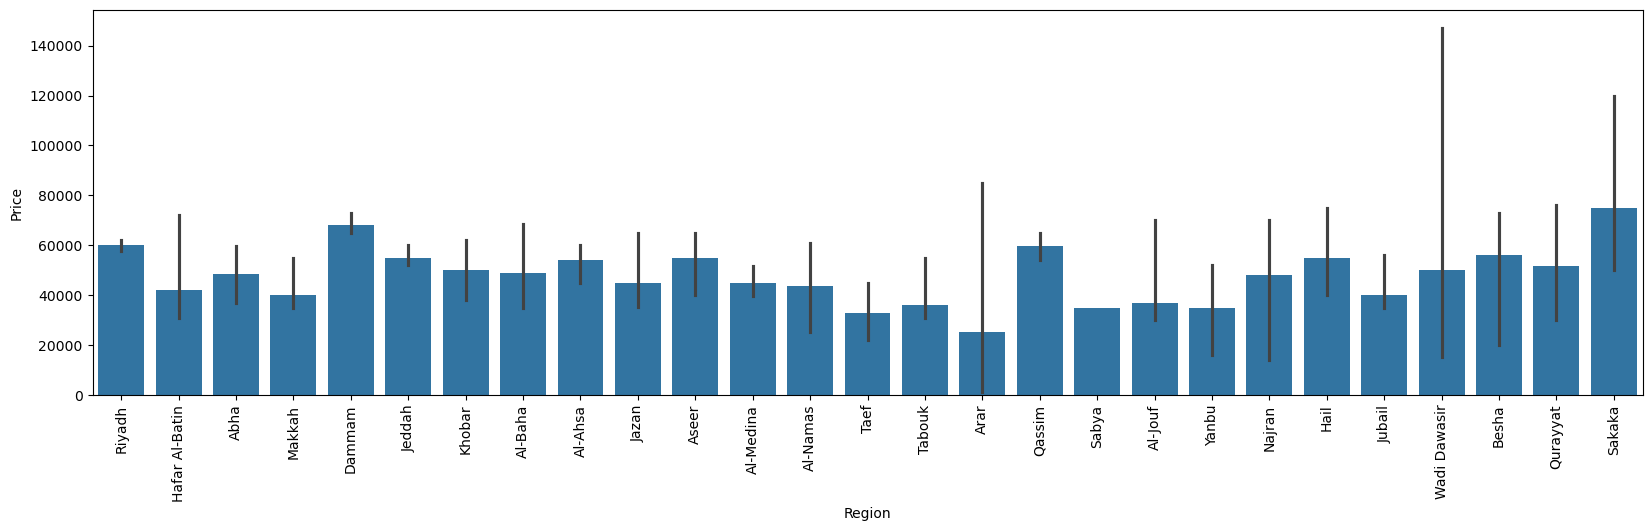

In [118]:
plt.figure(figsize=(20, 5))

sns.barplot(data=df, x='Region', y='Price', estimator='median')
plt.xticks(rotation=90)
plt.show()

Sakaka menjadi lokasi tempat mobil dijual dengan nilai tengah harga jual yang paling tinggi

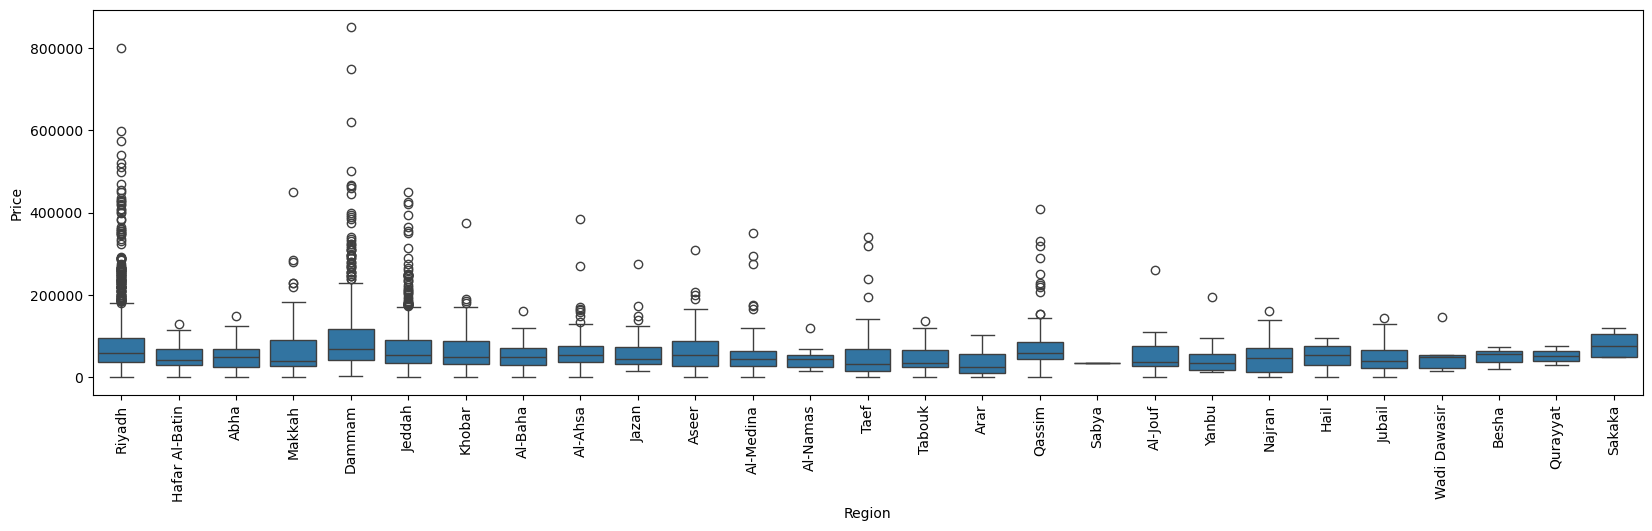

In [119]:
plt.figure(figsize=(20, 5))

sns.boxplot(data=df, x='Region', y='Price')
plt.xticks(rotation=90)
plt.show()

Harga termahal terdapat pada region Dammam

### Make

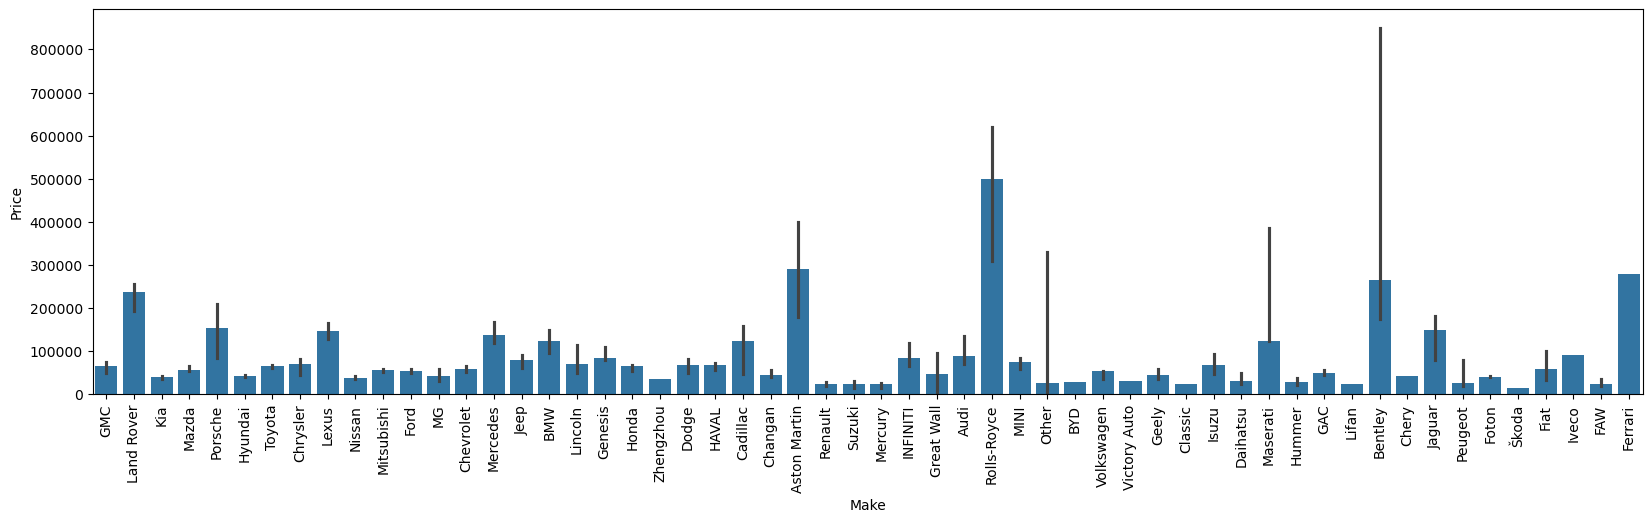

In [120]:
plt.figure(figsize=(20, 5))

sns.barplot(data=df, x='Make', y='Price', estimator='median')
plt.xticks(rotation=90)
plt.show()

Mobil Rolls_royce menjadi mobil dengan harga jual yang nilai tengahnya tinggi

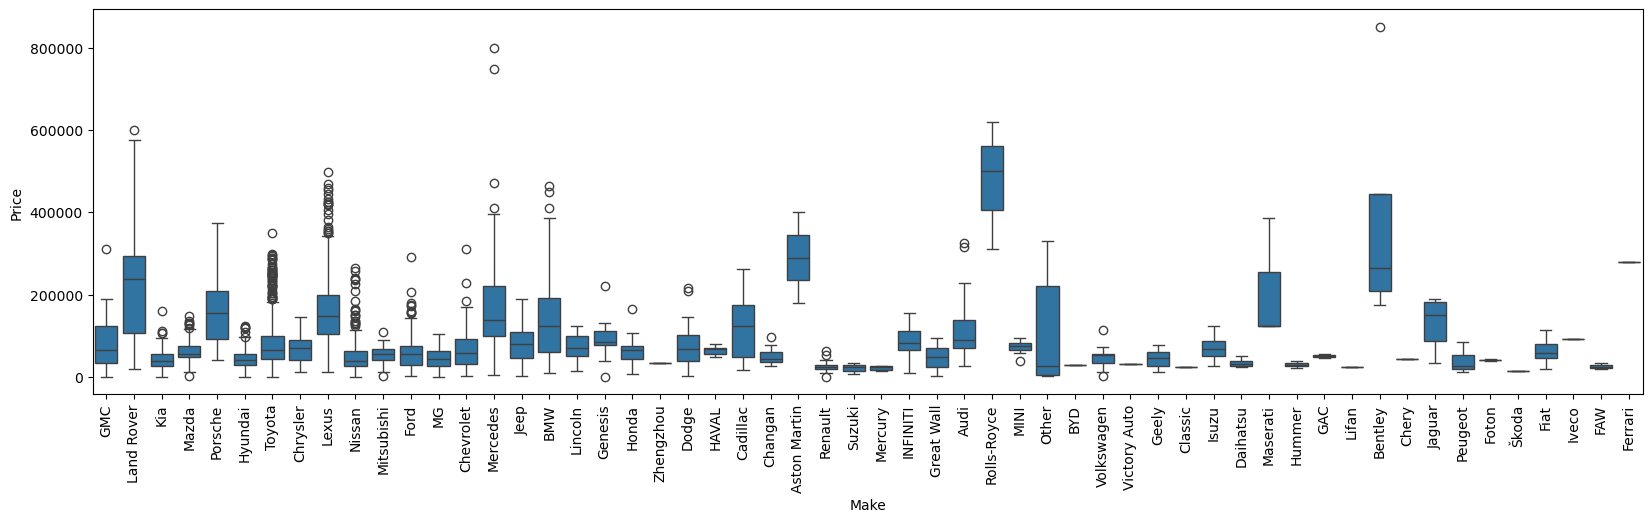

In [121]:
plt.figure(figsize=(20, 5))

sns.boxplot(data=df, x='Make', y='Price')
plt.xticks(rotation=90)
plt.show()

mobil bentley memiliki mobil dengan harga tertinggi

### Gear_Type

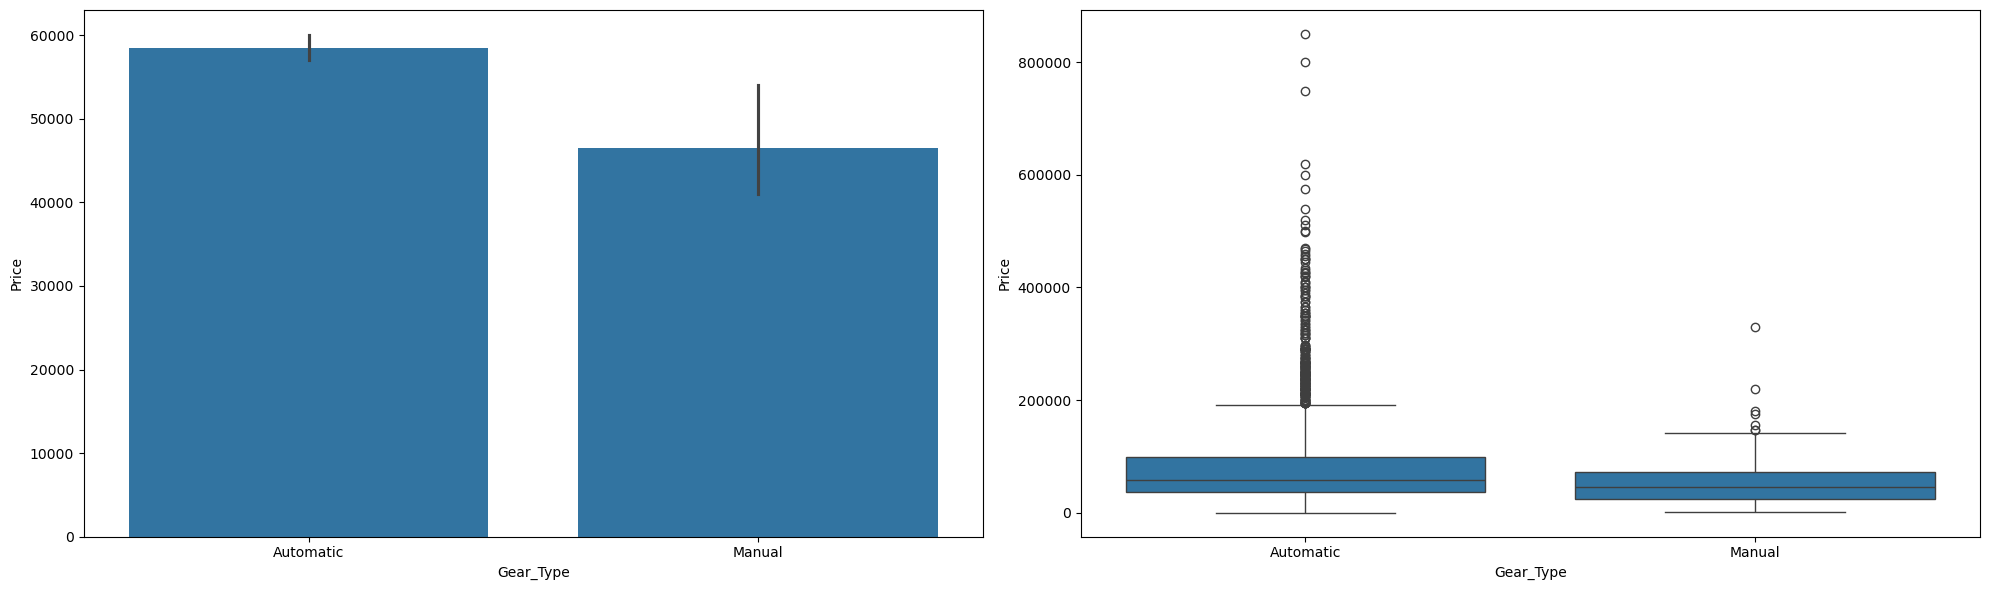

In [122]:
# Membuat figure dengan 2 subplot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Barplot (estimator median)
sns.barplot(data=df, x='Gear_Type', y='Price', estimator='median', ax=axes[0])

# Boxplot
sns.boxplot(data=df, x='Gear_Type', y='Price', ax=axes[1])

plt.tight_layout()
plt.show()

Mobil dengan transmisi Automatic menjadi mobil dengan harga jual yang paling mahal dibanding dengan mobil dengan transmisi Manual

### Origin

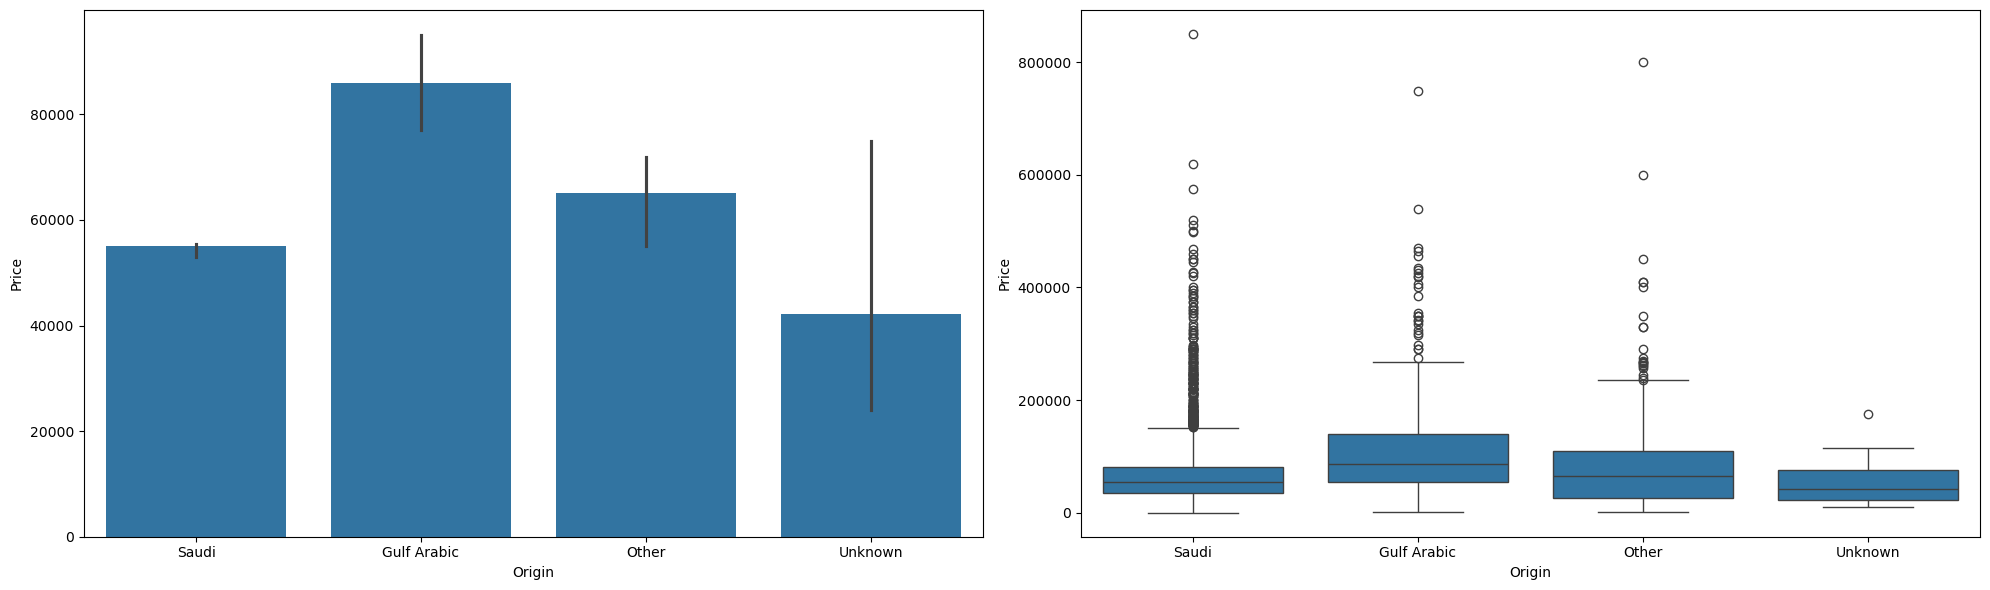

In [123]:
# Membuat figure dengan 2 subplot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Barplot (estimator median)
sns.barplot(data=df, x='Origin', y='Price', estimator='median', ax=axes[0])

# Boxplot
sns.boxplot(data=df, x='Origin', y='Price', ax=axes[1])

plt.tight_layout()
plt.show()

- Mobil yang Originnya Gulf Arabic menjadi mobil dengan harga jual lebih mahal dibanding yang lainnya
- Mobil termahal terdapat di mobil yang originnya Saudi

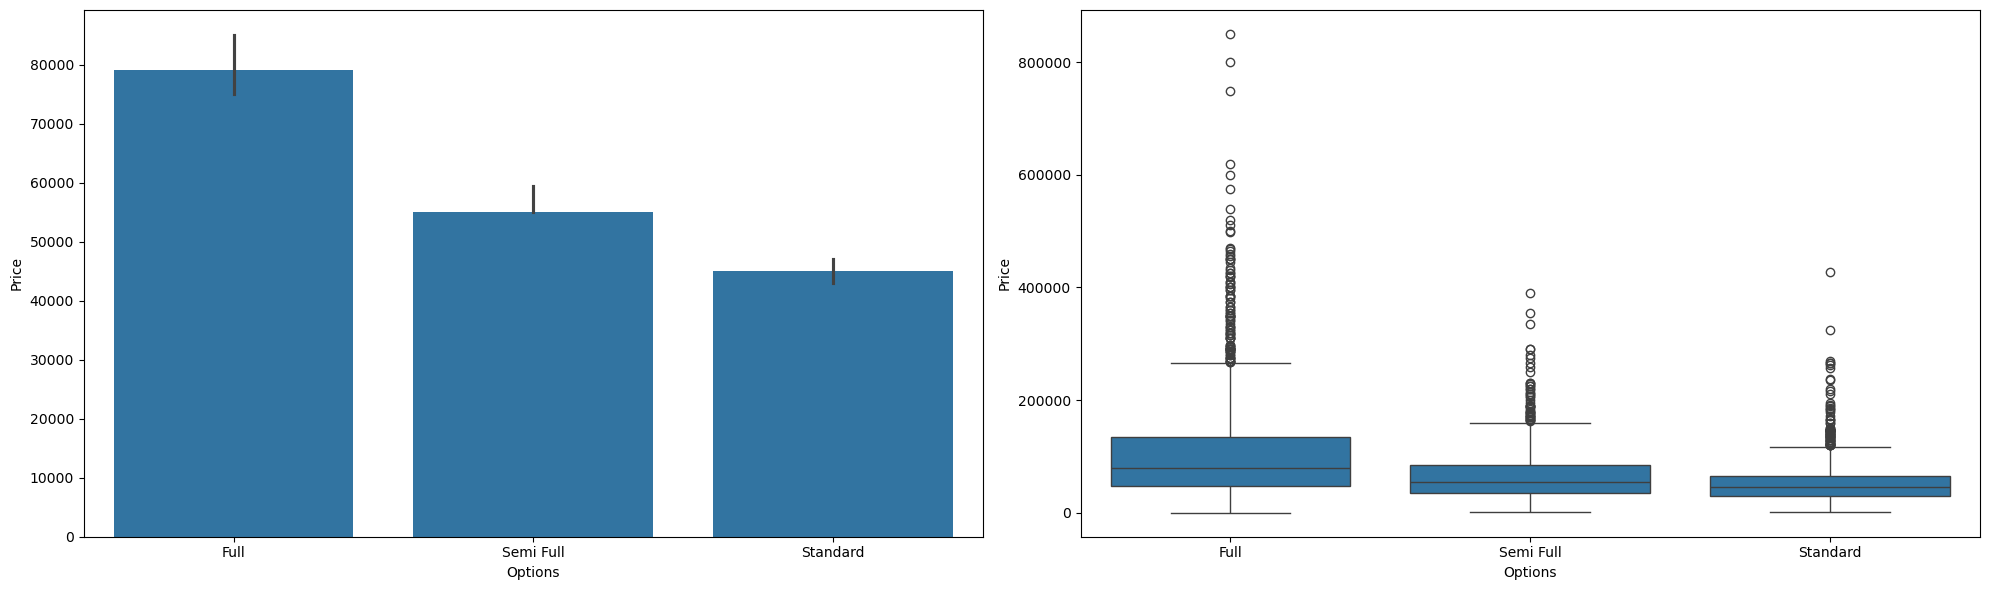

In [124]:
# Membuat figure dengan 2 subplot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Barplot (estimator median)
sns.barplot(data=df, x='Options', y='Price', estimator='median', ax=axes[0])

# Boxplot
sns.boxplot(data=df, x='Options', y='Price', ax=axes[1])

plt.tight_layout()
plt.show()

Mobil dengan Options Full menjadi mobil yang memiliki harga jual lebih mahal dibanding yang lainnya

### Year

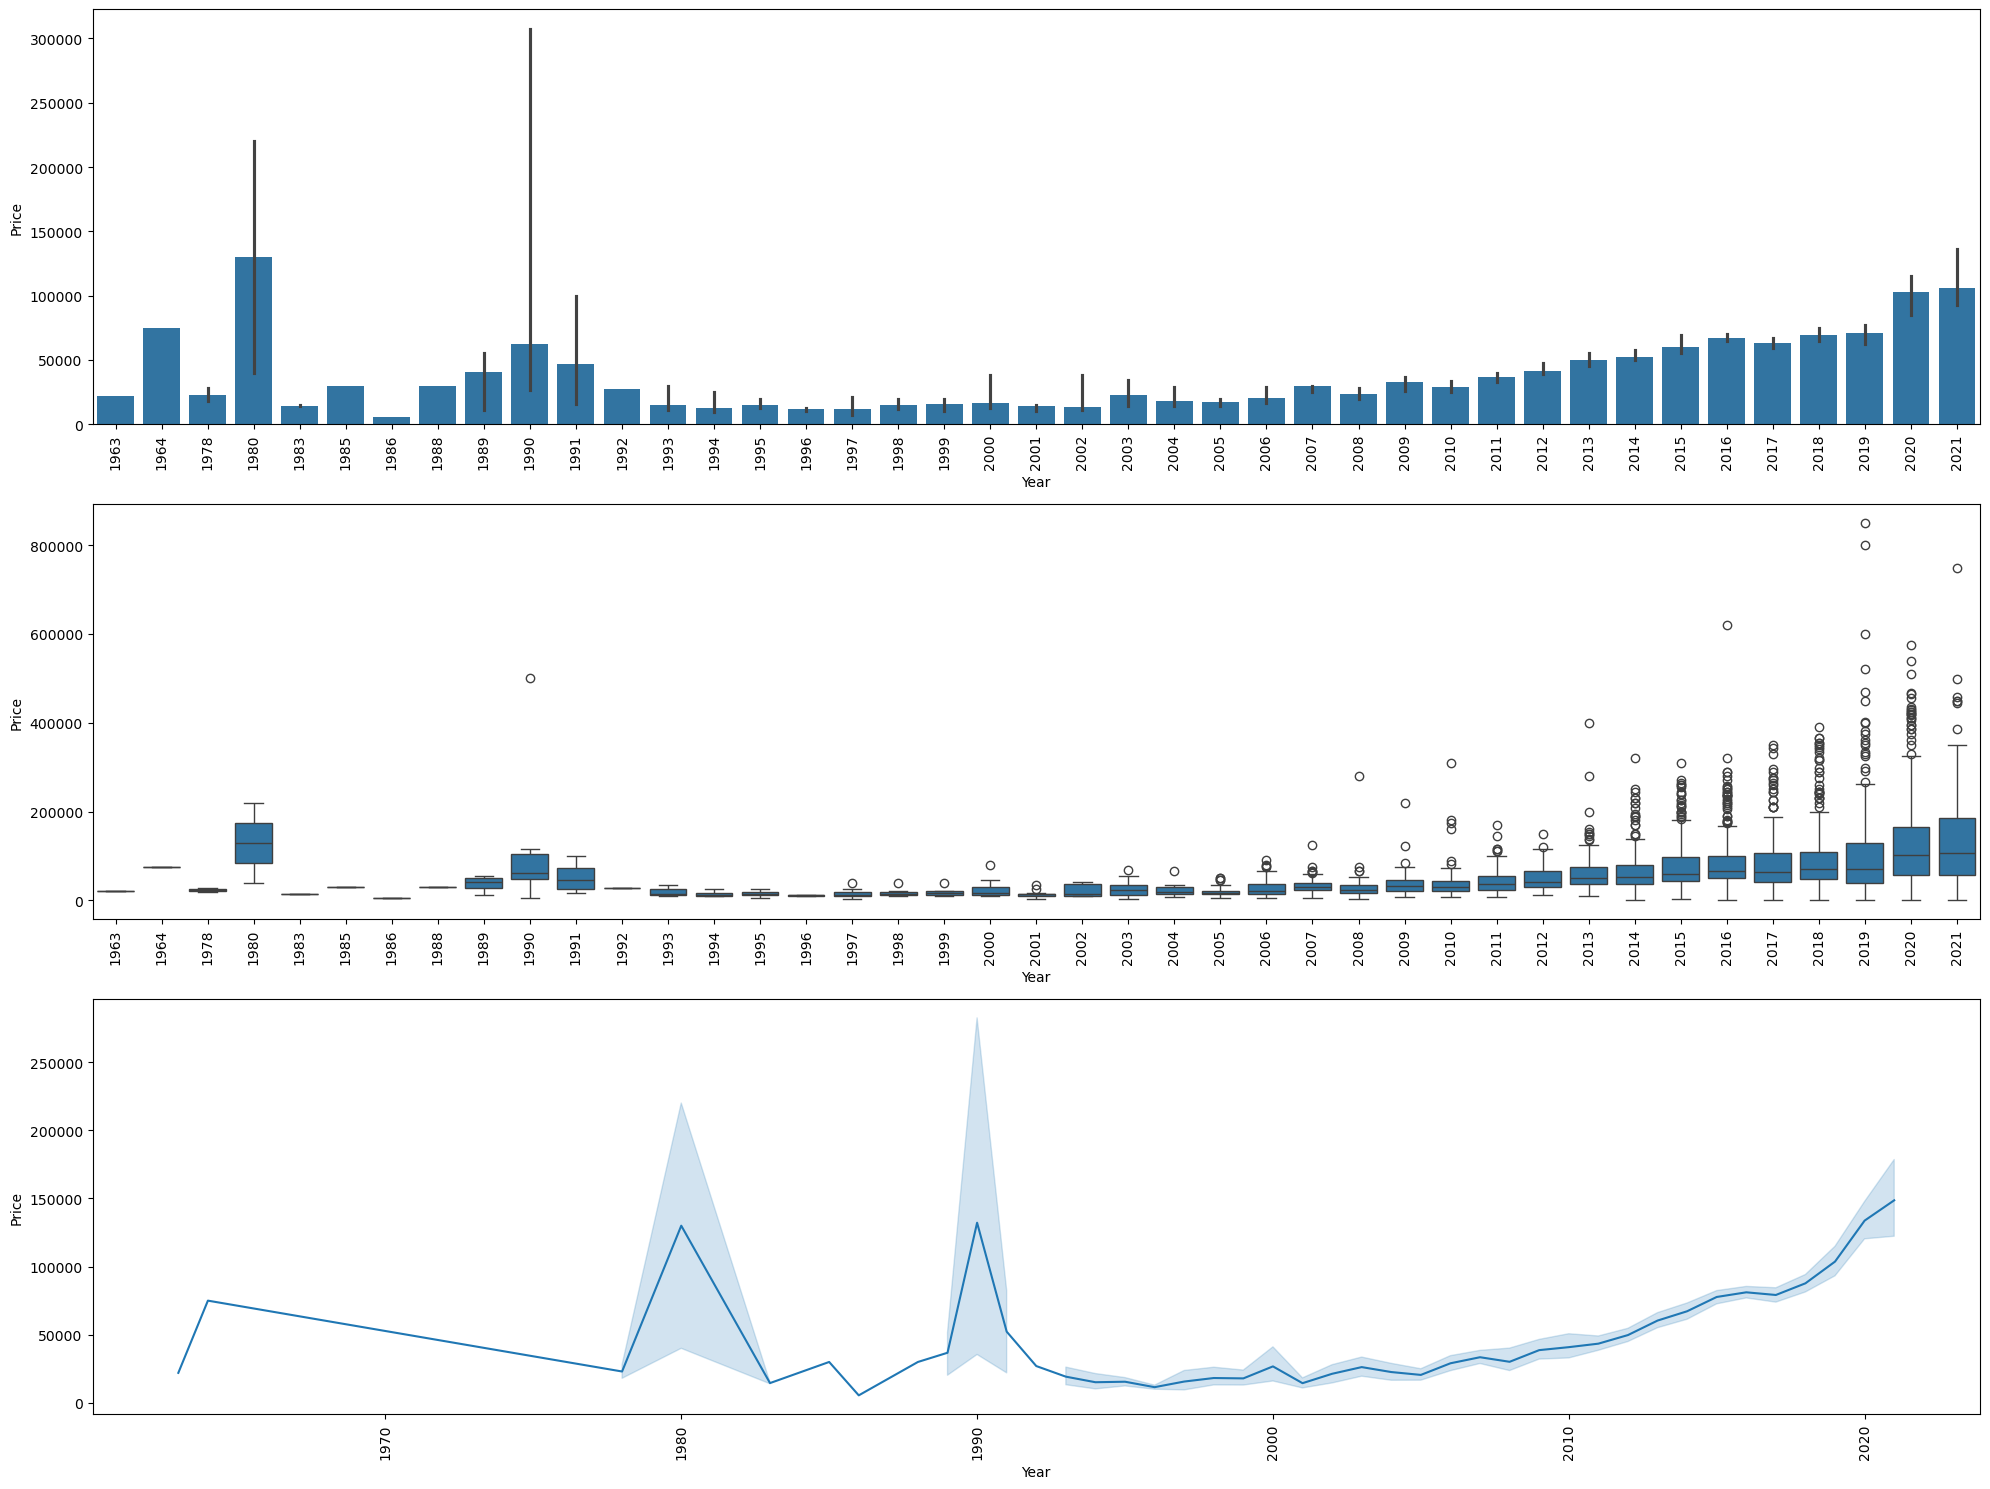

In [125]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15))  # 2 baris, 1 kolom

# Barplot di atas
sns.barplot(data=df, x='Year', y='Price', estimator='median', ax=axes[0])
axes[0].tick_params(axis='x', rotation=90)

# Boxplot di bawah
sns.boxplot(data=df, x='Year', y='Price', ax=axes[1])
axes[1].tick_params(axis='x', rotation=90)

sns.lineplot(data=df, x='Year', y='Price', ax=axes[2])
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()  # Supaya tidak saling tumpang tindih
plt.show()

- Mobil keluaran tahun 1980 menjadi mobil dengan nilai tengah tertinggi.
- Terjadi pelonjakan harga di tahun 1980 dan 1990.
- Ada pola harga naik ketika mobil keluaran baru atau tahunnya tinggi dimulai dari tahun 2000an.
- Mobil termahal terdapat pada mobil keluaran tahun 2019.

### Engine_Size

<Axes: xlabel='Engine_Size', ylabel='Count'>

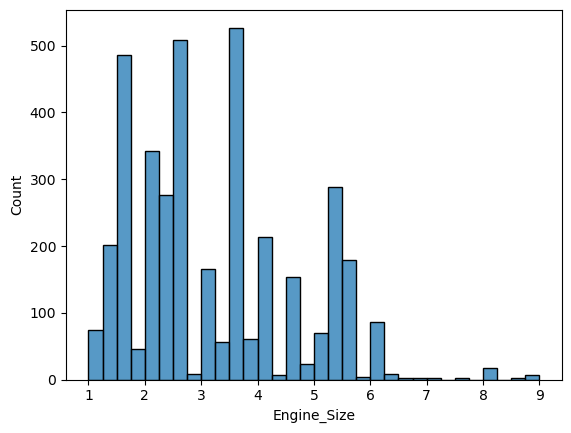

In [126]:
sns.histplot(data=df['Engine_Size'])

- Persebaran data Engine_Size bersifat Multimodal
- Engine_Size yang paling banyak/umum berada di sekitar 1.5, 2.5, dan 3.5

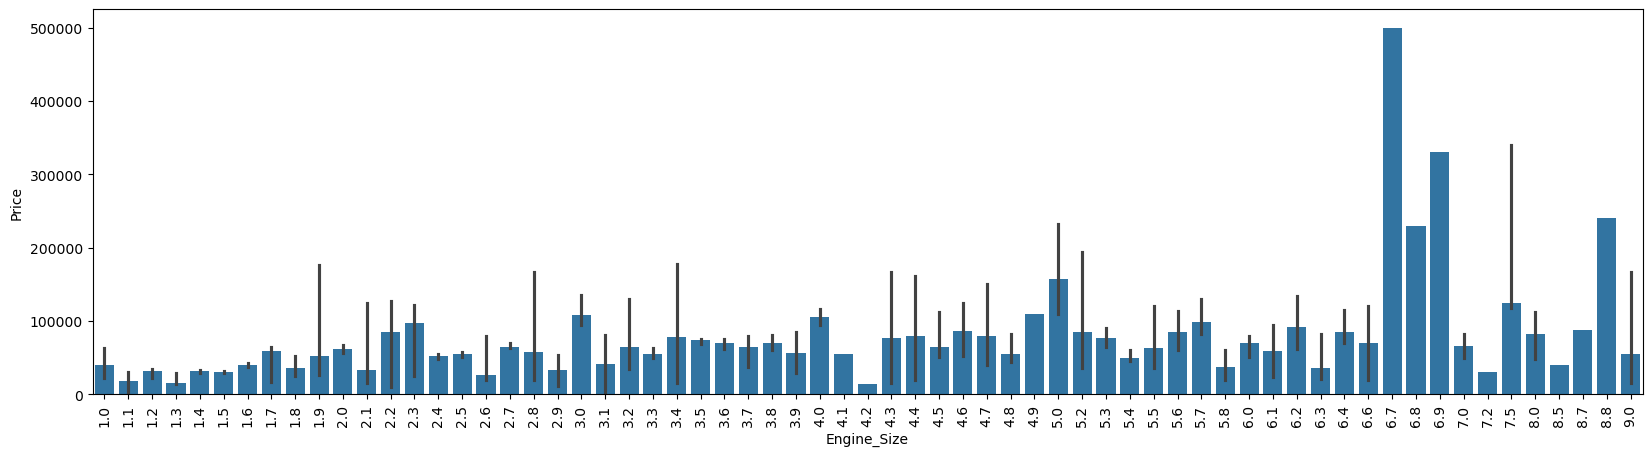

In [127]:
plt.figure(figsize=(20, 5))

sns.barplot(data=df, x='Engine_Size', y='Price', estimator='median')
plt.xticks(rotation=90)
plt.show()

Mobil dengan Engine Size sekitar 6.7 - 6.9, menjadi mobil dengan nilai tengah harga jual lebih mahal dibanding yang lain, tertinggi terdapat di mobil dengan Engine Size 6.7

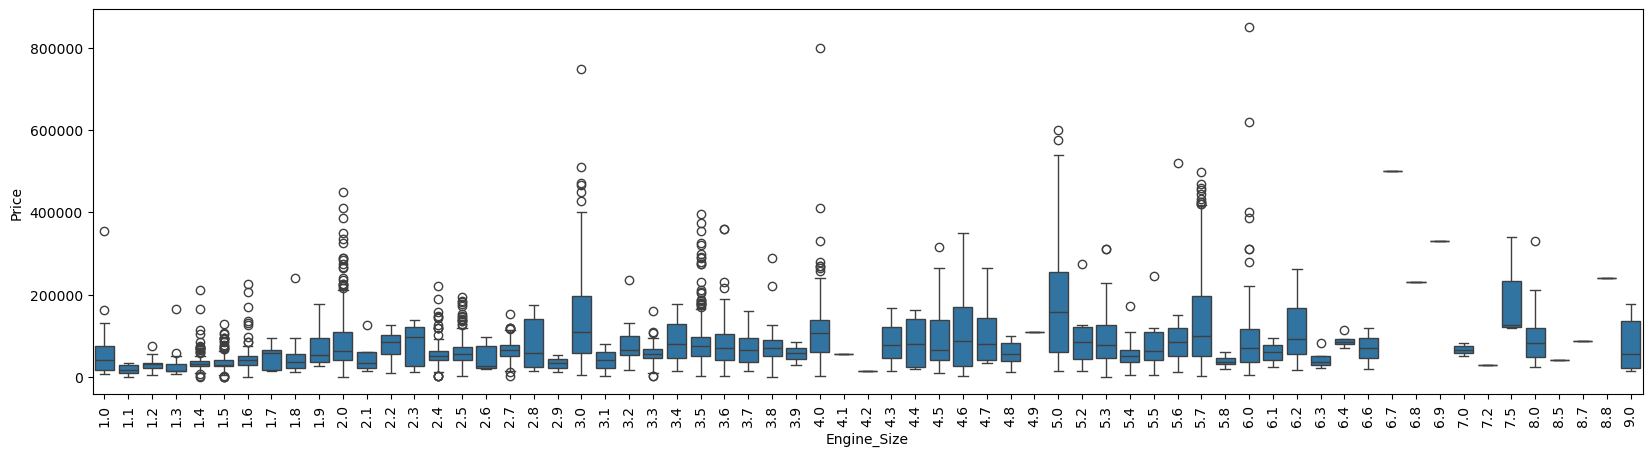

In [128]:
plt.figure(figsize=(20, 5))

sns.boxplot(data=df, x='Engine_Size', y='Price')
plt.xticks(rotation=90)
plt.show()

- Mobil dengan Engine_Size 6.7, 6.8, 6.9 memiliki box IQR yang sempit, begitu juga dengan Engine_Size 4.1, 4.2 7.2, 8.5, 8.7, dan 8.8. Bisa jadi dikarenakan jumlah datanya yang sedikit mengenai mobil dengan Engine_size tersebut.
- Mobil Engine_Size dengan harga termahal terdapat di Engine_Size 6.0

In [129]:
target_sizes = [4.1, 4.2, 6.7, 6.8, 6.9, 7.2, 8.5, 8.7, 8.8]

counts = (
    df[df['Engine_Size'].isin(target_sizes)]
    .groupby('Engine_Size')
    .size()
    .sort_index()
)

print(counts)

Engine_Size
4.1    1
4.2    1
6.7    1
6.8    1
6.9    1
7.2    1
8.5    1
8.7    1
8.8    1
dtype: int64


Seperti yang diasumsikan di awal, jumlah data dengan Engine_Size yang tertera di atas, sangat sedikit.

### Mileage

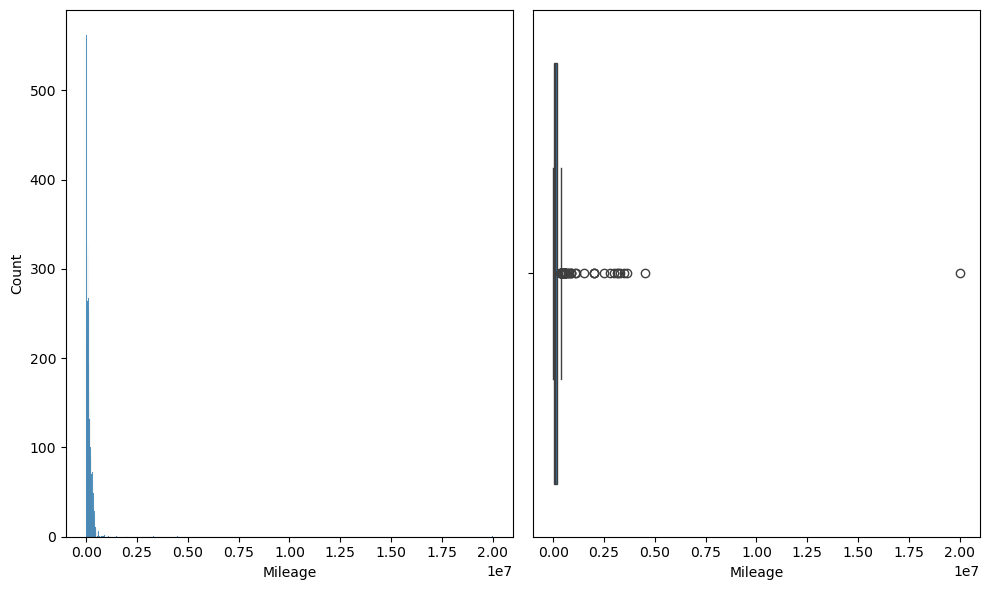

In [130]:
# Membuat figure dengan 2 subplot berdampingan
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Barplot (estimator median)
sns.histplot(data=df, x='Mileage', ax=axes[0])

# Boxplot
sns.boxplot(data=df, x='Mileage', ax=axes[1])

plt.tight_layout()
plt.show()

<Axes: xlabel='Mileage', ylabel='Price'>

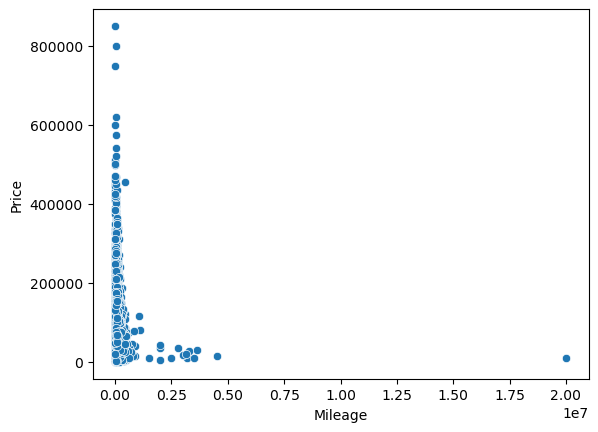

In [131]:
sns.scatterplot(data=df, x='Mileage', y='Price')

- Tidak terdapat pola tertentu antara Mileage dengan Price.
- Mobil dengan Mileage yang rendah, cenderung lebih mahal dibanding mobil dengan Mileage tinggi.

## Experiment Planning

### 1. Tujuan Eksperimen
Membangun model machine learning untuk memprediksi harga mobil bekas di Arab Saudi secara akurat berdasarkan karakteristik mobil, sehingga dapat membantu pembeli, penjual, dan platform jual beli menetapkan harga pasar yang adil.

### 2. Pertanyaan Penelitian
1. Feature apa saja yang paling memengaruhi harga mobil bekas di Arab Saudi?
2. Seberapa akurat model machine learning dapat memprediksi harga mobil bekas?

### 3. Dataset
- **Sumber:** syarah.com (data pasar mobil bekas di Arab Saudi)
- **Jumlah Data:** 5624 baris -> 3824 baris (setelah dicleaning)
- **Feature Utama:**
  - Type (kategori)
  - Region (kategori)
  - Make (kategori)
  - Gear_Type (kategori)
  - Origin (kategori)
  - Options (kategori)
  - Year (numerikal)
  - Engine_Size (numerikal)
  - Mileage (numerikal)
  - Negotiable (boolean)
  - Price (target numerikal)

### 4. Langkah-Langkah Eksperimen

#### a. Data Understanding
- Analisis tipe data, missing value, dan distribusi tiap feature.
- Identifikasi korelasi antara masing-masing feature dengan `Price`.
- EDA

#### b. Data Preparation
- Menangani missing values (drop).
- Encoding untuk fitur kategorikal.
- Scaling fitur numerikal.
- Split data menjadi training dan testing set.

#### c. Pemodelan
Model yang akan diuji:
1. **Linear Regression**
2. **KNeighborsRegressor**
3. **DecisionTreeRegressor**
4. **Lasso**
5. **Ridge**
6. **RandomForestRegressor**
7. **GradientBoostingRegressor**
8. **XGBRegressor**
9. **AdaBoostRegressor**
10. **BaggingRegressor**
11. **StackingRegressor**
12. **VotingRegressor**

#### d. Evaluasi Model
- Metrik evaluasi:
  - **MAE** (Mean Absolute Error)
  Alasan dipilih: MAE digunakan karena memberikan gambaran rata-rata kesalahan absolut tanpa memperbesar outlier. Ini membantu mengetahui seberapa jauh prediksi model dari nilai asli dalam satuan yang sama.
  - **MSE** (Mean Squared Error)
  Alasan dipilih: MSE memperbesar penalti untuk error yang besar karena menggunakan kuadrat. Ini berguna untuk lebih menekankan kesalahan besar, yang bisa sangat penting dalam aplikasi tertentu.
  - **RMSE** (Root Mean Squared Error)
  Alasan dipilih: RMSE dipakai karena memiliki interpretasi yang lebih mudah dibanding MSE, karena diakarkan. Nilainya dalam satuan asli target, seperti MAE, tetapi tetap memberikan penalti besar untuk error besar seperti MSE.
  - **MAPE** (Mean Absolute Percentage Error) 
  Alasan dipilih: MAPE digunakan karena metrik ini memberikan kesalahan dalam bentuk persentase, sehingga lebih mudah dibandingkan atau dipahami dalam konteks bisnis.
  - Kesimpulan pemilihan: Menggunakan MAE, MSE, RMSE, dan MAPE untuk mendapatkan gambaran lengkap dari performa model. MAE menunjukkan rata-rata kesalahan absolut, MSE dan RMSE memberikan penalti lebih besar untuk kesalahan besar, sedangkan MAPE membantu memahami kesalahan dalam bentuk persentase. Dengan kombinasi ini, saya bisa mengevaluasi model dari sisi praktis, teknis, dan bisnis.
- Cross-validation untuk mengukur kestabilan model dan mengetahui nilai error dari masing-masing model.

#### e. Model Tuning
- Hyperparameter tuning menggunakan GridSearchCV.
- Pemilihan model terbaik berdasarkan skor validasi.
- Analisis residual untuk melihat pola error.

#### f. Feature Engineering
- Menggunakan Bin Equal Interval

#### g. Interpretasi Model
- Analisis pengaruh masing-masing feature terhadap Price dengan Feature Importance.

## Define X & y

In [132]:
df['Options'].nunique()

3

In [133]:
X = df.drop(columns=['Price'])
y = df['Price']

## Data Splitting

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## Preprocessing

Encoding:
- Binary: Type, Region, Make (ketiga kolom ini merupakan kategori dan memiliki nilai unique yang banyak)
- OneHot: Gear_Type, Origin, Options, Negotiable (keempat kolom ini merupakan kategori memiliki nilai unique yang sedikit)

Scaler:
- Robust: Engine_Size, Mileage (persebaran data pada kedua kolom ini tidak normal)

In [135]:
df.describe(include='object')

,Type,Region,Make,Gear_Type,Origin,Options
count,3824,3824,3824,3824,3824,3824
unique,320,27,56,2,4,3
top,Camry,Riyadh,Toyota,Automatic,Saudi,Full
freq,149,1615,889,3420,2893,1473


In [136]:
transformer = ColumnTransformer([
    ('binary', BinaryEncoder(), ['Type', 'Region', 'Make']),
    ('onehot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options', 'Negotiable']),
    ('robust', RobustScaler(), ['Engine_Size', 'Mileage'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options',
                                  'Negotiable']),
                                ('robust', RobustScaler(),
                                 ['Engine_Size', 'Mileage'])])

## CrossValidation

In [137]:
linreg = LinearRegression()
knn = KNeighborsRegressor()
dectree = DecisionTreeRegressor()
ls = Lasso(random_state=0)
rg = Ridge(random_state=0)
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xg = XGBRegressor()
ab = AdaBoostRegressor()
bg = BaggingRegressor()
st = StackingRegressor(
    estimators=[('lr', LinearRegression())], 
    final_estimator=LinearRegression()
)
vt = VotingRegressor(
    estimators=[('lr', LinearRegression())]
)

In [138]:
list_algo = [linreg, knn, dectree, ls, rg, rf, gb, xg, ab, bg, st, vt]

MAE

In [139]:
list_score = []
list_mean = []
list_std = []

# looping

for algo in list_algo:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algo)
    ])

    # cross validation
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring= 'neg_mean_absolute_error'
    )

    # list_score.append(cv_score.round(3))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

In [140]:
df_cv = pd.DataFrame()
df_cv['algo'] = list_algo
# df_cv['scores'] = list_score
df_cv['mean_MAE'] = list_mean
df_cv['std_MAE'] = list_std

df_cv

,algo,mean_MAE,std_MAE
0,LinearRegression(),-35102.004713,1403.214348
1,KNeighborsRegressor(),-20018.449753,2236.611586
2,DecisionTreeRegressor(),-27092.404360,1402.393237
3,Lasso(random_state=0),-35099.181252,1403.900244
4,Ridge(random_state=0),-35078.712969,1407.977603
5,RandomForestRegressor(),-19428.617403,1771.037572
6,GradientBoostingRegressor(),-22252.376968,1793.392425
7,"XGBRegressor(base_score=None, booster=None, ca...",-19396.775000,1225.692357
8,AdaBoostRegressor(),-51070.216265,2378.706749
9,BaggingRegressor(),-20754.452499,1040.338824


MSE

In [141]:
list_score = []
list_mean = []
list_std = []

# looping

for algo in list_algo:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algo)
    ])

    # cross validation
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring= 'neg_mean_squared_error'
    )

    # list_score.append(cv_score.round(3))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

In [142]:
df_cv['mean_MSE'] = list_mean
df_cv['std_MSE'] = list_std

df_cv

,algo,mean_MAE,std_MAE,mean_MSE,std_MSE
0,LinearRegression(),-35102.004713,1403.214348,-3.378726e+09,3.320735e+08
1,KNeighborsRegressor(),-20018.449753,2236.611586,-1.613688e+09,5.996583e+08
2,DecisionTreeRegressor(),-27092.404360,1402.393237,-3.474224e+09,6.783731e+08
3,Lasso(random_state=0),-35099.181252,1403.900244,-3.378661e+09,3.321400e+08
4,Ridge(random_state=0),-35078.712969,1407.977603,-3.377684e+09,3.324322e+08
5,RandomForestRegressor(),-19428.617403,1771.037572,-1.577390e+09,3.992712e+08
6,GradientBoostingRegressor(),-22252.376968,1793.392425,-1.704087e+09,3.973510e+08
7,"XGBRegressor(base_score=None, booster=None, ca...",-19396.775000,1225.692357,-1.451470e+09,2.457747e+08
8,AdaBoostRegressor(),-51070.216265,2378.706749,-4.387453e+09,7.339168e+08
9,BaggingRegressor(),-20754.452499,1040.338824,-1.697484e+09,3.859039e+08


RMSE

In [143]:
list_score = []
list_mean = []
list_std = []

# looping

for algo in list_algo:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algo)
    ])

    # cross validation
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring= 'neg_root_mean_squared_error'
    )

    # list_score.append(cv_score.round(3))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

In [144]:
df_cv['mean_RMSE'] = list_mean
df_cv['std_RMSE'] = list_std

df_cv

,algo,mean_MAE,std_MAE,mean_MSE,std_MSE,mean_RMSE,std_RMSE
0,LinearRegression(),-35102.004713,1403.214348,-3.378726e+09,3.320735e+08,-58056.280698,2862.476731
1,KNeighborsRegressor(),-20018.449753,2236.611586,-1.613688e+09,5.996583e+08,-39547.675854,7047.672164
2,DecisionTreeRegressor(),-27092.404360,1402.393237,-3.474224e+09,6.783731e+08,-57908.866241,5167.155759
3,Lasso(random_state=0),-35099.181252,1403.900244,-3.378661e+09,3.321400e+08,-58055.693564,2863.062131
4,Ridge(random_state=0),-35078.712969,1407.977603,-3.377684e+09,3.324322e+08,-58047.145673,2865.867879
5,RandomForestRegressor(),-19428.617403,1771.037572,-1.577390e+09,3.992712e+08,-39358.872201,4818.259078
6,GradientBoostingRegressor(),-22252.376968,1793.392425,-1.704087e+09,3.973510e+08,-40979.535927,4922.342678
7,"XGBRegressor(base_score=None, booster=None, ca...",-19396.775000,1225.692357,-1.451470e+09,2.457747e+08,-37954.853906,3301.386610
8,AdaBoostRegressor(),-51070.216265,2378.706749,-4.387453e+09,7.339168e+08,-65420.059951,5656.760695
9,BaggingRegressor(),-20754.452499,1040.338824,-1.697484e+09,3.859039e+08,-41561.577470,5084.666279


MAPE

In [145]:
list_score = []
list_mean = []
list_std = []

# looping

for algo in list_algo:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algo)
    ])

    # cross validation
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring= 'neg_mean_absolute_percentage_error'
    )

    # list_score.append(cv_score.round(3))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

In [146]:
df_cv['mean_MAPE'] = list_mean
df_cv['std_MAPE'] = list_std

df_cv

,algo,mean_MAE,std_MAE,mean_MSE,std_MSE,mean_RMSE,std_RMSE,mean_MAPE,std_MAPE
0,LinearRegression(),-35102.004713,1403.214348,-3.378726e+09,3.320735e+08,-58056.280698,2862.476731,-45.488730,87.646652
1,KNeighborsRegressor(),-20018.449753,2236.611586,-1.613688e+09,5.996583e+08,-39547.675854,7047.672164,-49.257220,95.547846
2,DecisionTreeRegressor(),-27092.404360,1402.393237,-3.474224e+09,6.783731e+08,-57908.866241,5167.155759,-38.858215,74.756311
3,Lasso(random_state=0),-35099.181252,1403.900244,-3.378661e+09,3.321400e+08,-58055.693564,2863.062131,-45.490757,87.650717
4,Ridge(random_state=0),-35078.712969,1407.977603,-3.377684e+09,3.324322e+08,-58047.145673,2865.867879,-45.502569,87.675954
5,RandomForestRegressor(),-19428.617403,1771.037572,-1.577390e+09,3.992712e+08,-39358.872201,4818.259078,-46.024299,89.276231
6,GradientBoostingRegressor(),-22252.376968,1793.392425,-1.704087e+09,3.973510e+08,-40979.535927,4922.342678,-48.592955,94.457315
7,"XGBRegressor(base_score=None, booster=None, ca...",-19396.775000,1225.692357,-1.451470e+09,2.457747e+08,-37954.853906,3301.386610,-41.833804,80.966842
8,AdaBoostRegressor(),-51070.216265,2378.706749,-4.387453e+09,7.339168e+08,-65420.059951,5656.760695,-58.049471,110.340192
9,BaggingRegressor(),-20754.452499,1040.338824,-1.697484e+09,3.859039e+08,-41561.577470,5084.666279,-36.838260,70.975057


Insight:
- XGB dan RandomForest adalah dua model yang memberikan hasil terbaik secara keseluruhan berdasarkan nilai MAE(XGB: 19396.775000, RandomForest: 19707.650311), MSE(XGB: 1451470000, RandomForest: 1613873000), dan RMSE(XGB: 37954.853906, RandomForest: 39477.681230). XGB sedikit lebih unggul.
- DecisionTree menjadi model dengan MAPE terendah, bernilai 36.644634.
- LinearRegression, Lasso, Ridge, dan Voting menjadi model dengan nilai yang mirip dari keseluruhan metric (MAE: berkisar di sekitar 35000, MSE: berkisar di sekitar 3378000000, RMSE: berkisar di sekitar 58050, dan MAPE: berkisar di sekitar 45.49).

Model yang akan dipilih -> XGB -> karena memiliki MAE, MSE, dan RMSE terbaik dan MAPE yang relatif tidak jomplang dengan MAPE terendah.

## Mengecek multicollinearity

In [147]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [148]:
X_transform = transformer.fit_transform(X)
X_transform

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         2.65000000e+00, -1.70370370e-01,  2.01400000e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.15000000e+00,  2.74074074e-01,  2.01500000e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.50000000e-01,  8.66666667e-01,  2.01500000e+03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -1.00000000e-01, -1.79303704e-01,  2.01800000e+03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.30000000e+00, -4.07407407e-01,  2.01600000e+03],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
        -1.00000000e-01, -1.62962963e-01,  2.01600000e+03]])

In [149]:
feature_names = transformer.get_feature_names_out()
df_transformed = pd.DataFrame(X_transform, columns=feature_names)
df_transformed.corr()

,binary__Type_0,binary__Type_1,binary__Type_2,binary__Type_3,binary__Type_4,binary__Type_5,binary__Type_6,binary__Type_7,binary__Type_8,binary__Region_0,...,binary__Make_5,onehot__Gear_Type_Manual,onehot__Origin_Other,onehot__Origin_Saudi,onehot__Origin_Unknown,onehot__Options_Semi Full,onehot__Options_Standard,robust__Engine_Size,robust__Mileage,remainder__Year
binary__Type_0,1.000000,-0.058963,-0.088618,0.022209,0.030661,0.005897,-0.017408,-0.024053,-0.010976,-0.025166,...,0.002814,-0.000492,0.008768,-0.004365,-0.009832,-0.004364,-0.058484,-0.014844,-0.021871,0.003381
binary__Type_1,-0.058963,1.000000,0.030883,-0.010388,-0.016513,0.000619,-0.040463,-0.071275,-0.001733,-0.006436,...,0.083352,0.017545,0.071483,-0.035693,-0.013201,-0.031136,-0.076188,-0.033510,-0.022441,-0.028686
binary__Type_2,-0.088618,0.030883,1.000000,0.051337,-0.120761,-0.050467,-0.016843,-0.008888,-0.061858,-0.000559,...,0.046523,-0.070138,0.039482,-0.062050,-0.003126,-0.023580,-0.037563,0.039145,-0.028056,0.021455
binary__Type_3,0.022209,-0.010388,0.051337,1.000000,-0.004519,-0.050725,-0.082739,-0.024489,0.141498,0.018761,...,0.090550,0.122548,0.042979,-0.073824,0.017680,0.018954,-0.026768,-0.062703,0.019081,-0.040725
binary__Type_4,0.030661,-0.016513,-0.120761,-0.004519,1.000000,0.033477,0.100221,0.050326,-0.150626,-0.050465,...,-0.236383,-0.077559,0.051086,0.015003,-0.014546,0.061129,0.089492,-0.119388,0.003374,-0.002185
binary__Type_5,0.005897,0.000619,-0.050467,-0.050725,0.033477,1.000000,-0.203047,0.064000,0.034085,0.024485,...,0.080192,0.118208,-0.030381,-0.010010,-0.035115,-0.013885,-0.056891,-0.036519,-0.026000,-0.017540
binary__Type_6,-0.017408,-0.040463,-0.016843,-0.082739,0.100221,-0.203047,1.000000,0.014068,-0.213068,0.005802,...,-0.187471,-0.137686,-0.040704,0.078358,0.003704,-0.033607,0.203831,-0.220756,0.002946,0.121032
binary__Type_7,-0.024053,-0.071275,-0.008888,-0.024489,0.050326,0.064000,0.014068,1.000000,-0.132539,0.007915,...,0.029447,0.068598,-0.044082,0.035449,-0.016934,0.060428,-0.007361,0.001749,0.023352,0.066467
binary__Type_8,-0.010976,-0.001733,-0.061858,0.141498,-0.150626,0.034085,-0.213068,-0.132539,1.000000,0.039036,...,0.307474,0.091131,-0.032127,-0.056085,0.019681,0.047843,-0.143041,0.094514,0.044802,-0.059102
binary__Region_0,-0.025166,-0.006436,-0.000559,0.018761,-0.050465,0.024485,0.005802,0.007915,0.039036,1.000000,...,0.024450,0.070388,0.017797,-0.046359,-0.000347,0.027689,-0.023571,0.001179,0.015341,-0.039089


In [150]:
def calc_vif(tabel):

    vif_df = pd.DataFrame()
    vif_df['feature'] = tabel.columns

    vif_value = [variance_inflation_factor(tabel.values, kolom) for kolom in range(tabel.shape[1])]
    vif_df['vif'] = vif_value

    return vif_df

In [151]:
calc_vif(df_transformed)

,feature,vif
0,binary__Type_0,1.158815
1,binary__Type_1,1.551645
2,binary__Type_2,1.595878
3,binary__Type_3,1.967040
4,binary__Type_4,2.034342
5,binary__Type_5,2.018149
6,binary__Type_6,2.658667
7,binary__Type_7,2.561117
8,binary__Type_8,2.659690
9,binary__Region_0,1.100793


Insight:
- kolom Year memiliki nilai vif yang sangat tinggi, yaitu 40.24, sehingga akan coba untuk didrop dan melihat hasilnya

In [152]:
calc_vif(df_transformed.drop(columns=['remainder__Year']))

,feature,vif
0,binary__Type_0,1.156096
1,binary__Type_1,1.541774
2,binary__Type_2,1.578889
3,binary__Type_3,1.948608
4,binary__Type_4,2.014108
5,binary__Type_5,1.921105
6,binary__Type_6,2.506812
7,binary__Type_7,2.435306
8,binary__Type_8,2.542200
9,binary__Region_0,1.098900


Insight:
- Ketika kolom year didrop, nilai binary__Region_4 turun dari 8.14 -> 5.87 dan onehot__Origin_Saudi juga turun dari 7.28 -> 5.98.
- Ini mengindikasikan terdapat korelasi yang kuat antara kolom year dengan kolom binary__Region_4 dan onehot__Origin_Saudi.

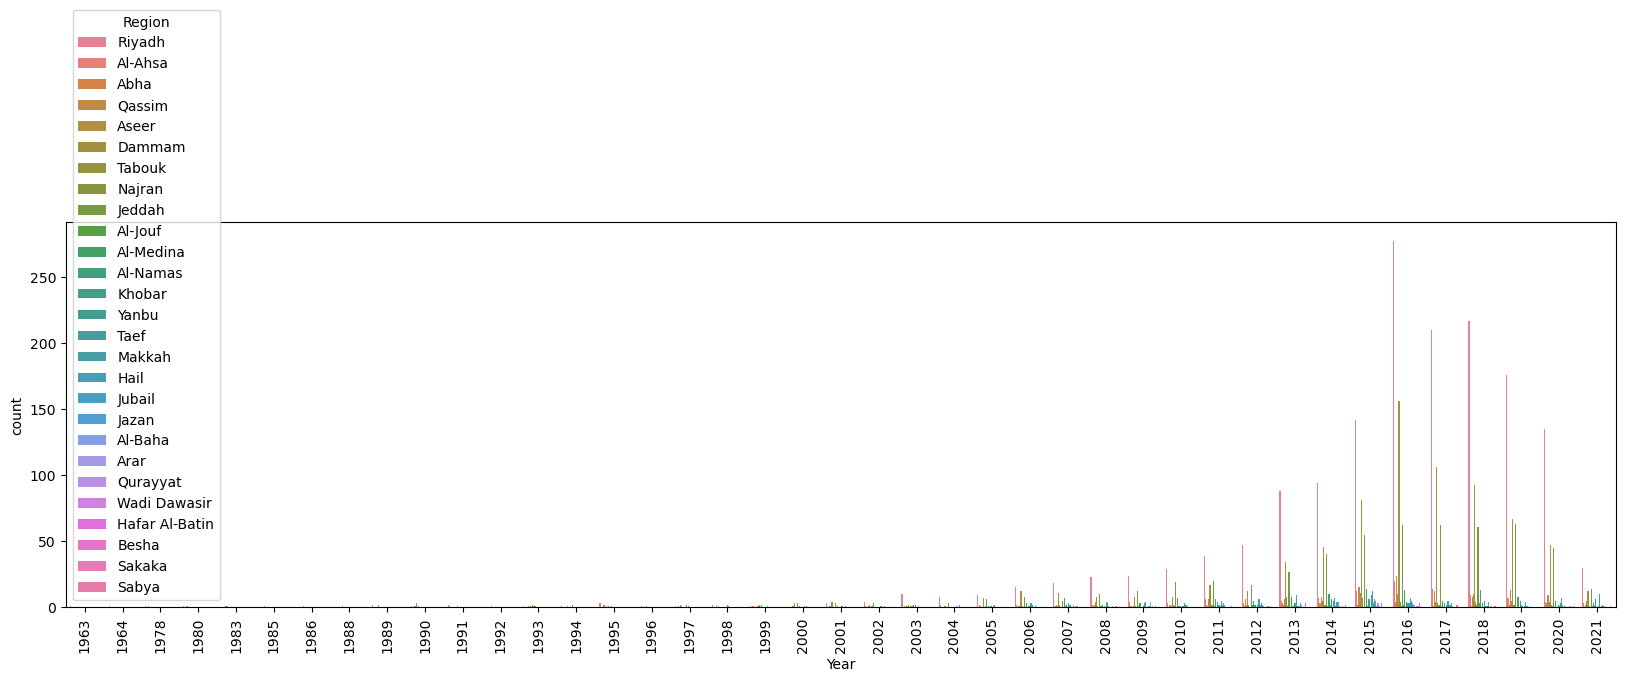

In [153]:
plt.figure(figsize=(20, 5))

sns.countplot(data=df, x='Year', hue='Region')
plt.xticks(rotation=90)
plt.show()

Insight:
- Semakin tinggi tahun, semakin naik juga jumlah count pada Region-Region tertentu

## Modeling tanpa kolom year

In [154]:
# drop kolom Year
transformer = ColumnTransformer([
    ('binary', BinaryEncoder(), ['Type', 'Region', 'Make']),
    ('onehot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options', 'Negotiable']),
    ('robust', RobustScaler(), ['Engine_Size', 'Mileage']),
    ('drop_year', 'drop', ['Year'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options',
                                  'Negotiable']),
                                ('robust', RobustScaler(),
                                 ['Engine_Size', 'Mileage']),
                                ('drop_year', 'drop', ['Year'])])

MAE

In [155]:
list_score = []
list_mean = []
list_std = []

# looping

for algo in list_algo:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algo)
    ])

    # cross validation
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring= 'neg_mean_absolute_error'
    )

    # list_score.append(cv_score.round(3))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

In [156]:
df_cv = pd.DataFrame()
df_cv['algo'] = list_algo
# df_cv['scores'] = list_score
df_cv['mean_MAE'] = list_mean
df_cv['std_MAE'] = list_std

df_cv

,algo,mean_MAE,std_MAE
0,LinearRegression(),-40808.956384,2063.197064
1,KNeighborsRegressor(),-29462.529637,1887.982687
2,DecisionTreeRegressor(),-33883.080772,2362.356254
3,Lasso(random_state=0),-40806.065573,2063.588900
4,Ridge(random_state=0),-40777.606793,2065.734095
5,RandomForestRegressor(),-25128.970675,1404.149926
6,GradientBoostingRegressor(),-27832.838154,1025.850750
7,"XGBRegressor(base_score=None, booster=None, ca...",-25685.892969,1415.940700
8,AdaBoostRegressor(),-54124.939045,3444.138652
9,BaggingRegressor(),-26653.071748,1542.792508


MSE

In [157]:
list_score = []
list_mean = []
list_std = []

# looping

for algo in list_algo:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algo)
    ])

    # cross validation
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring= 'neg_mean_squared_error'
    )

    # list_score.append(cv_score.round(3))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

In [158]:
df_cv['mean_MSE'] = list_mean
df_cv['std_MSE'] = list_std

df_cv

,algo,mean_MAE,std_MAE,mean_MSE,std_MSE
0,LinearRegression(),-40808.956384,2063.197064,-4.589325e+09,1.101269e+09
1,KNeighborsRegressor(),-29462.529637,1887.982687,-2.781850e+09,4.055866e+08
2,DecisionTreeRegressor(),-33883.080772,2362.356254,-4.169489e+09,7.988151e+08
3,Lasso(random_state=0),-40806.065573,2063.588900,-4.589281e+09,1.101398e+09
4,Ridge(random_state=0),-40777.606793,2065.734095,-4.587954e+09,1.102066e+09
5,RandomForestRegressor(),-25128.970675,1404.149926,-2.102697e+09,2.965416e+08
6,GradientBoostingRegressor(),-27832.838154,1025.850750,-2.295178e+09,2.696468e+08
7,"XGBRegressor(base_score=None, booster=None, ca...",-25685.892969,1415.940700,-1.916590e+09,2.602081e+08
8,AdaBoostRegressor(),-54124.939045,3444.138652,-4.698972e+09,7.154196e+08
9,BaggingRegressor(),-26653.071748,1542.792508,-2.248475e+09,3.404244e+08


RMSE

In [159]:
list_score = []
list_mean = []
list_std = []

# looping

for algo in list_algo:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algo)
    ])

    # cross validation
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring= 'neg_root_mean_squared_error'
    )

    # list_score.append(cv_score.round(3))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

In [160]:
df_cv['mean_RMSE'] = list_mean
df_cv['std_RMSE'] = list_std

df_cv

,algo,mean_MAE,std_MAE,mean_MSE,std_MSE,mean_RMSE,std_RMSE
0,LinearRegression(),-40808.956384,2063.197064,-4.589325e+09,1.101269e+09,-67321.078628,7562.920805
1,KNeighborsRegressor(),-29462.529637,1887.982687,-2.781850e+09,4.055866e+08,-52605.632656,3807.611929
2,DecisionTreeRegressor(),-33883.080772,2362.356254,-4.169489e+09,7.988151e+08,-62904.218678,6690.145541
3,Lasso(random_state=0),-40806.065573,2063.588900,-4.589281e+09,1.101398e+09,-67320.660827,7563.736302
4,Ridge(random_state=0),-40777.606793,2065.734095,-4.587954e+09,1.102066e+09,-67310.266250,7568.475205
5,RandomForestRegressor(),-25128.970675,1404.149926,-2.102697e+09,2.965416e+08,-45705.188179,3305.856042
6,GradientBoostingRegressor(),-27832.838154,1025.850750,-2.295178e+09,2.696468e+08,-47861.509756,2857.220185
7,"XGBRegressor(base_score=None, booster=None, ca...",-25685.892969,1415.940700,-1.916590e+09,2.602081e+08,-43676.068750,2998.582232
8,AdaBoostRegressor(),-54124.939045,3444.138652,-4.698972e+09,7.154196e+08,-67040.765241,6546.111592
9,BaggingRegressor(),-26653.071748,1542.792508,-2.248475e+09,3.404244e+08,-47821.179355,4844.978559


MAPE

In [161]:
list_score = []
list_mean = []
list_std = []

# looping

for algo in list_algo:
    pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', algo)
    ])

    # cross validation
    cv_score = cross_val_score(
        estimator= pipe_model,
        X= X_train,
        y= y_train,
        cv= 5,
        scoring= 'neg_mean_absolute_percentage_error'
    )

    # list_score.append(cv_score.round(3))
    list_mean.append(cv_score.mean())
    list_std.append(cv_score.std())

In [162]:
df_cv['mean_MAPE'] = list_mean
df_cv['std_MAPE'] = list_std

df_cv

,algo,mean_MAE,std_MAE,mean_MSE,std_MSE,mean_RMSE,std_RMSE,mean_MAPE,std_MAPE
0,LinearRegression(),-40808.956384,2063.197064,-4.589325e+09,1.101269e+09,-67321.078628,7562.920805,-35.317881,67.444831
1,KNeighborsRegressor(),-29462.529637,1887.982687,-2.781850e+09,4.055866e+08,-52605.632656,3807.611929,-25.958109,49.027982
2,DecisionTreeRegressor(),-33883.080772,2362.356254,-4.169489e+09,7.988151e+08,-62904.218678,6690.145541,-48.887196,94.562595
3,Lasso(random_state=0),-40806.065573,2063.588900,-4.589281e+09,1.101398e+09,-67320.660827,7563.736302,-35.318512,67.446148
4,Ridge(random_state=0),-40777.606793,2065.734095,-4.587954e+09,1.102066e+09,-67310.266250,7568.475205,-35.326903,67.464201
5,RandomForestRegressor(),-25128.970675,1404.149926,-2.102697e+09,2.965416e+08,-45705.188179,3305.856042,-42.685247,82.556655
6,GradientBoostingRegressor(),-27832.838154,1025.850750,-2.295178e+09,2.696468e+08,-47861.509756,2857.220185,-47.043135,91.257824
7,"XGBRegressor(base_score=None, booster=None, ca...",-25685.892969,1415.940700,-1.916590e+09,2.602081e+08,-43676.068750,2998.582232,-39.261572,75.755306
8,AdaBoostRegressor(),-54124.939045,3444.138652,-4.698972e+09,7.154196e+08,-67040.765241,6546.111592,-45.967567,86.120581
9,BaggingRegressor(),-26653.071748,1542.792508,-2.248475e+09,3.404244e+08,-47821.179355,4844.978559,-49.263516,95.670992


Insight:
- Dengan melakukan drop pada kolom Year, error menjadi semakin besar, sehingga, drop kolom year tidak dilakukan untuk final model

**Sebelum Drop Kolom Year**

| **Algorithm**                    | **mean_MAE**      | **mean_MSE**         | **mean_RMSE**       | **mean_MAPE**       |
|-----------------------------------|-------------------|----------------------|---------------------|---------------------|
| LinearRegression()                | -35102.004713     | -3.378726e+09        | -58056.280698       | -45.488730          |
| KNeighborsRegressor()             | -20018.449753     | -1.613688e+09        | -39547.675854       | -49.257220          |
| DecisionTreeRegressor()           | -27446.990971     | -3.597350e+09        | -57392.994674       | -36.503276          |
| Lasso(random_state=0)             | -35099.181252     | -3.378661e+09        | -58055.693564       | -45.490757          |
| Ridge(random_state=0)             | -35078.712969     | -3.377684e+09        | -58047.145673       | -45.502569          |
| RandomForestRegressor()           | -19699.704192     | -1.594357e+09        | -39186.875867       | -47.938027          |
| GradientBoostingRegressor()       | -22237.514627     | -1.704363e+09        | -41001.388908       | -48.595751          |
| XGBRegressor()                    | -19396.775000     | -1.451470e+09        | -37954.853906       | -41.833804          |
| AdaBoostRegressor()               | -50317.782704     | -4.218750e+09        | -65079.756976       | -52.744744          |
| BaggingRegressor()                | -21580.461565     | -1.858367e+09        | -42029.205924       | -30.950231          |
| StackingRegressor()               | -34647.652942     | -3.390806e+09        | -58176.425199       | -43.402171          |
| VotingRegressor()                 | -35102.004713     | -3.378726e+09        | -58056.280698       | -45.488730          |

---

**Sesudah Drop Kolom Year**

| **Algorithm**                    | **mean_MAE**      | **mean_MSE**         | **mean_RMSE**       | **mean_MAPE**       |
|-----------------------------------|-------------------|----------------------|---------------------|---------------------|
| LinearRegression()                | -40808.956384     | -4.589325e+09        | -67321.078628       | -35.317881          |
| KNeighborsRegressor()             | -29462.529637     | -2.781850e+09        | -52605.632656       | -25.958109          |
| DecisionTreeRegressor()           | -34059.138170     | -4.081745e+09        | -63697.928398       | -48.926713          |
| Lasso(random_state=0)             | -40806.065573     | -4.589281e+09        | -67320.660827       | -35.318512          |
| Ridge(random_state=0)             | -40777.606793     | -4.587954e+09        | -67310.266250       | -35.326903          |
| RandomForestRegressor()           | -25204.984410     | -2.075532e+09        | -45419.682454       | -43.987584          |
| GradientBoostingRegressor()       | -27841.421556     | -2.296246e+09        | -47852.618340       | -47.039803          |
| XGBRegressor()                    | -25685.892969     | -1.916590e+09        | -43676.068750       | -39.261572          |
| AdaBoostRegressor()               | -55387.885966     | -4.741402e+09        | -67320.727780       | -48.356729          |
| BaggingRegressor()                | -26944.556385     | -2.342385e+09        | -48231.402232       | -50.446759          |
| StackingRegressor()               | -40644.027681     | -4.704942e+09        | -68321.391023       | -32.011745          |
| VotingRegressor()                 | -40808.956384     | -4.589325e+09        | -67321.078628       | -35.317881          |



In [163]:
# menggunakan transformer yang tidak drop kolom Year
transformer = ColumnTransformer([
    ('binary', BinaryEncoder(), ['Type', 'Region', 'Make']),
    ('onehot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options', 'Negotiable']),
    ('robust', RobustScaler(), ['Engine_Size', 'Mileage']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options',
                                  'Negotiable']),
                                ('robust', RobustScaler(),
                                 ['Engine_Size', 'Mileage'])])

## Test ke testset sebelum diHyperparameter tuning

In [164]:
df_XGB = pd.DataFrame()

In [165]:
model_awal = XGBRegressor()
pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model_awal)
    ])

pipe_model.fit(X_train, y_train)

y_pred = pipe_model.predict(X_test)

# Evaluasi
MAE_score = mean_absolute_error(y_test, y_pred)
MSE_score = mean_squared_error(y_test, y_pred)
RMSE_score = root_mean_squared_error(y_test, y_pred)
MAPE_score = mean_absolute_percentage_error(y_test, y_pred)

In [166]:
# Membuat DataFrame baru dengan hasil evaluasi
df_result = pd.DataFrame({
    'Awal/Akhir': ['model_awal'],
    'MAE': [MAE_score],
    'MSE': [MSE_score],
    'RMSE': [RMSE_score],
    'MAPE': [MAPE_score]
})

# Menggabungkan df_XGB dengan df_result menggunakan pd.concat
df_XGB = pd.concat([df_XGB, df_result], ignore_index=True)

df_XGB

,Awal/Akhir,MAE,MSE,RMSE,MAPE
0,model_awal,17277.441406,816222016.0,28569.599609,0.969008


## Hyperparameter Tuning

In [167]:
hyperparam = {
    'modeling__n_estimators': [100, 200, 300],
    'modeling__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'modeling__max_depth': [3, 4, 5, 6]
}

# untuk isi estimator
model = XGBRegressor()
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', model)
])

# define grid search
gridsearchXG = GridSearchCV(
    estimator=pipe_model,
    param_grid=hyperparam,
    cv=5,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

In [168]:
# fit gridsearch ke train set
gridsearchXG.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('binary',
                                                                         BinaryEncoder(),
                                                                         ['Type',
                                                                          'Region',
                                                                          'Make']),
                                                                        ('onehot',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Gear_Type',
                                                                          'Origin',
                                                                          'Options',
                                                                          'Negotiable']),
                                                                        ('robust',
                                                                         RobustScaler(),
                                                                         ['Engine_Size',
                                                                          'Mileage'])])),
                                       ('modeling',
                                        XGBRegressor(base_score=None,...
                                                     max_delta_step=None,
                                                     max_depth=None,
                                                     max_leaves=None,
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'modeling__learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'modeling__max_depth': [3, 4, 5, 6],
                         'modeling__n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [169]:
# hasil kombinasi hyperparameter
pd.DataFrame(gridsearchXG.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_modeling__learning_rate,param_modeling__max_depth,param_modeling__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
23,0.513627,0.041025,0.028045,0.000860,0.05,6,300,"{'modeling__learning_rate': 0.05, 'modeling__m...",-19809.263672,-16069.854492,-17920.095703,-18882.945312,-19890.044922,-18514.440820,1416.608404,1
35,0.475987,0.008196,0.027042,0.000768,0.10,6,300,"{'modeling__learning_rate': 0.1, 'modeling__ma...",-19771.835938,-16302.856445,-17715.814453,-18880.134766,-20185.863281,-18571.300977,1415.709838,2
32,0.368162,0.022335,0.025637,0.000840,0.10,5,300,"{'modeling__learning_rate': 0.1, 'modeling__ma...",-19984.689453,-16508.894531,-17629.447266,-19261.699219,-19550.478516,-18587.041797,1309.387281,3
34,0.360769,0.029715,0.026031,0.000599,0.10,6,200,"{'modeling__learning_rate': 0.1, 'modeling__ma...",-20090.625000,-16332.839844,-17643.408203,-19030.984375,-20216.750000,-18662.921484,1487.069498,4
22,0.399715,0.049923,0.025500,0.001808,0.05,6,200,"{'modeling__learning_rate': 0.05, 'modeling__m...",-20297.585938,-16186.052734,-17983.324219,-19031.488281,-19970.533203,-18693.796875,1490.622861,5
31,0.265884,0.002808,0.024176,0.000757,0.10,5,200,"{'modeling__learning_rate': 0.1, 'modeling__ma...",-20290.166016,-16586.744141,-17786.417969,-19468.429688,-19724.212891,-18771.194141,1374.282621,6
33,0.224321,0.021566,0.023171,0.000663,0.10,6,100,"{'modeling__learning_rate': 0.1, 'modeling__ma...",-20653.097656,-16704.734375,-17523.984375,-19394.894531,-20210.201172,-18897.382422,1532.806250,7
20,0.367284,0.004958,0.025306,0.001129,0.05,5,300,"{'modeling__learning_rate': 0.05, 'modeling__m...",-21142.931641,-16605.181641,-17464.117188,-19354.804688,-20555.119141,-19024.430859,1745.138652,8
30,0.181034,0.007691,0.024013,0.001083,0.10,5,100,"{'modeling__learning_rate': 0.1, 'modeling__ma...",-21007.404297,-17068.142578,-17898.578125,-20082.673828,-20081.816406,-19227.723047,1487.151349,9
45,0.216376,0.005839,0.024325,0.001773,0.30,6,100,"{'modeling__learning_rate': 0.3, 'modeling__ma...",-19996.560547,-17139.761719,-19117.148438,-20137.316406,-20593.087891,-19396.775000,1225.692357,10


Insight:

Model ditrain:
- sebelum hyperparameter tuning: 19396.775000
- sesudah hyperparameter tuning: 18514.440820

Hyperparameter tuning menurunkan nilai error

In [170]:
# best hyperparameter
gridsearchXG.best_params_

{'modeling__learning_rate': 0.05,
 'modeling__max_depth': 6,
 'modeling__n_estimators': 300}

In [171]:
gridsearchXG.best_estimator_

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options', 'Negotiable']),
                                                 ('robust', RobustScaler(),
                                                  ['Engine_Size',
                                                   'Mileage'])])),
                ('modeling',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

## Model dengan best params

In [172]:
model_final = gridsearchXG.best_estimator_

model_final.fit(X_train, y_train)

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('binary', BinaryEncoder(),
                                                  ['Type', 'Region', 'Make']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['Gear_Type', 'Origin',
                                                   'Options', 'Negotiable']),
                                                 ('robust', RobustScaler(),
                                                  ['Engine_Size',
                                                   'Mileage'])])),
                ('modeling',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=6, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=300, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [173]:
y_pred_final = model_final.predict(X_test)

# Evaluasi
MAE_score = mean_absolute_error(y_test, y_pred_final)
MSE_score = mean_squared_error(y_test, y_pred_final)
RMSE_score = root_mean_squared_error(y_test, y_pred_final)
MAPE_score = mean_absolute_percentage_error(y_test, y_pred_final)

In [174]:
df_result = pd.DataFrame({
    'Awal/Akhir': ['model_final'],
    'MAE': [MAE_score],
    'MSE': [MSE_score],
    'RMSE': [RMSE_score],
    'MAPE': [MAPE_score]
})

df_XGB = pd.concat([df_XGB, df_result], ignore_index=True)

df_XGB

,Awal/Akhir,MAE,MSE,RMSE,MAPE
0,model_awal,17277.441406,816222016.0,28569.599609,0.969008
1,model_final,16414.681641,733792896.0,27088.611328,1.018183


Insight:
- Dengan hyperparameter tuning, model memiliki score lebih baik, nilai error lebih rendah

## Feature Engineering

Dengan Binning

Menggunakan Binning untuk kolom Year dengan menggunakan bin equal interval (Ordinal Encoding)

Alasan melakukan Binning untuk kolom Year:
- Kolom 'Year' merupakan variabel numerik yang rentangnya cukup besar (1963 - 2021). Dengan melakukan binning menjadi 10 interval yang sama besar, kita menyederhanakan informasi waktu dengan harapan mengurangi kompleksitas sehingga dapat menaikkan score.

In [175]:
from sklearn.preprocessing import KBinsDiscretizer

In [176]:
# membuat transformer dengan Binning Equal Interval untuk kolom Year
transformer = ColumnTransformer([
    ('binary', BinaryEncoder(), ['Type', 'Region', 'Make']),
    ('onehot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options', 'Negotiable']),
    ('robust', RobustScaler(), ['Engine_Size', 'Mileage']),
    ('BinEq', KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform'), ['Year'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options',
                                  'Negotiable']),
                                ('robust', RobustScaler(),
                                 ['Engine_Size', 'Mileage']),
                                ('BinEq',
                                 KBinsDiscretizer(encode='ordinal', n_bins=10,
                                                  strategy='uniform'),
                                 ['Year'])])

In [177]:
# menggunakan model dengan parameter terbaik
model_binning = XGBRegressor(learning_rate = 0.05, max_depth = 6, n_estimators = 300)
pipe_modelbinning = Pipeline([
        ('preprocessing', transformer),
        ('modeling', model_binning)
    ])

pipe_model.fit(X_train, y_train)

y_pred = pipe_model.predict(X_test)

# Evaluasi
MAE_score = mean_absolute_error(y_test, y_pred)
MSE_score = mean_squared_error(y_test, y_pred)
RMSE_score = root_mean_squared_error(y_test, y_pred)
MAPE_score = mean_absolute_percentage_error(y_test, y_pred)

In [178]:
df_result = pd.DataFrame({
    'Awal/Akhir': ['model_binning'],
    'MAE': [MAE_score],
    'MSE': [MSE_score],
    'RMSE': [RMSE_score],
    'MAPE': [MAPE_score]
})

df_XGB = pd.concat([df_XGB, df_result], ignore_index=True)

df_XGB

,Awal/Akhir,MAE,MSE,RMSE,MAPE
0,model_awal,17277.441406,816222016.0,28569.599609,0.969008
1,model_final,16414.681641,733792896.0,27088.611328,1.018183
2,model_binning,17277.441406,816222016.0,28569.599609,0.969008


Insight:
- Dengan melakukan feature engineering binning, membuat error semakin besar pada model, sehingga feature engineering tidak dilakukan untuk model final.

In [179]:
# mengubah transformer kebali tanpa menggunakan binning
transformer = ColumnTransformer([
    ('binary', BinaryEncoder(), ['Type', 'Region', 'Make']),
    ('onehot', OneHotEncoder(drop='first'), ['Gear_Type', 'Origin', 'Options', 'Negotiable']),
    ('robust', RobustScaler(), ['Engine_Size', 'Mileage']),
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('binary', BinaryEncoder(),
                                 ['Type', 'Region', 'Make']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['Gear_Type', 'Origin', 'Options',
                                  'Negotiable']),
                                ('robust', RobustScaler(),
                                 ['Engine_Size', 'Mileage'])])

In [180]:
model_final = gridsearchXG.best_estimator_

model_final.fit(X_train, y_train)

y_pred_final = model_final.predict(X_test)

## Residual Plot

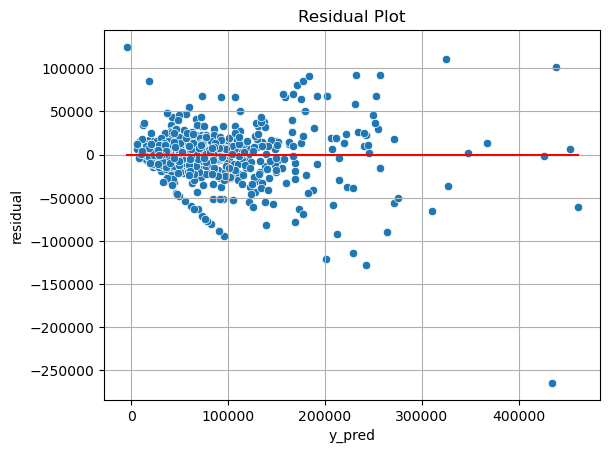

In [181]:
error = y_test - y_pred_final

sns.scatterplot(x = y_pred_final, y = error)
sns.lineplot(x=y_pred_final, y = 0, color = 'red')
plt.title('Residual Plot')
plt.xlabel('y_pred')
plt.ylabel('residual')
plt.grid()

**Residual Plot**
- Sumbu X (y_pred) → nilai prediksi dari model.
- Sumbu Y (residual) → selisih antara nilai aktual dan nilai prediksi (y_true - y_pred).
- Garis merah horizontal → garis nol, artinya residual = 0 (prediksi tepat).

1. Sebagian besar titik berkumpul di sekitar residual = 0, artinya prediksi model cukup akurat untuk banyak data.
2. Ada pola menyebar secara asimetris:
- Di nilai prediksi rendah (0–100000), residual masih cukup tersebar, namun cenderung simetris di atas dan bawah garis nol.
- Di nilai prediksi tinggi (>200000), ada outlier dengan residual sangat besar (baik positif maupun negatif). Ini mengindikasikan model kesulitan memprediksi harga sangat tinggi.
3. Ada indikasi varian residual sedikit meningkat seiring bertambahnya nilai prediksi (heteroskedastisitas ringan).
4. Outlier ekstrem terlihat di kisaran prediksi tinggi, yang menunjukkan ada data yang sangat berbeda dari pola umum (mungkin mobil super mahal/langka).

## SHAP Analysis

In [182]:
import shap

In [183]:
best_model = model_final.named_steps['modeling']

In [184]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=None, num_parallel_tree=None, ...)

In [185]:
X_test_transformed = pipe_model.named_steps['preprocessing'].transform(X_test)

In [186]:
# Ambil nama fitur setelah preprocessing
feature_names = model_final.named_steps['preprocessing'].get_feature_names_out()

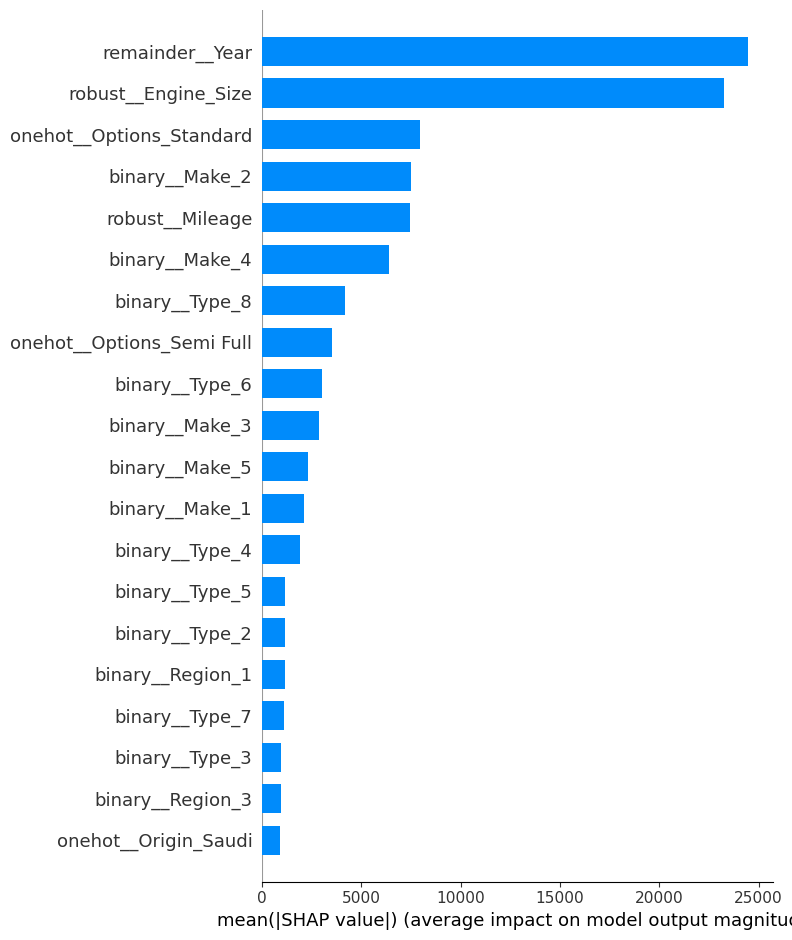

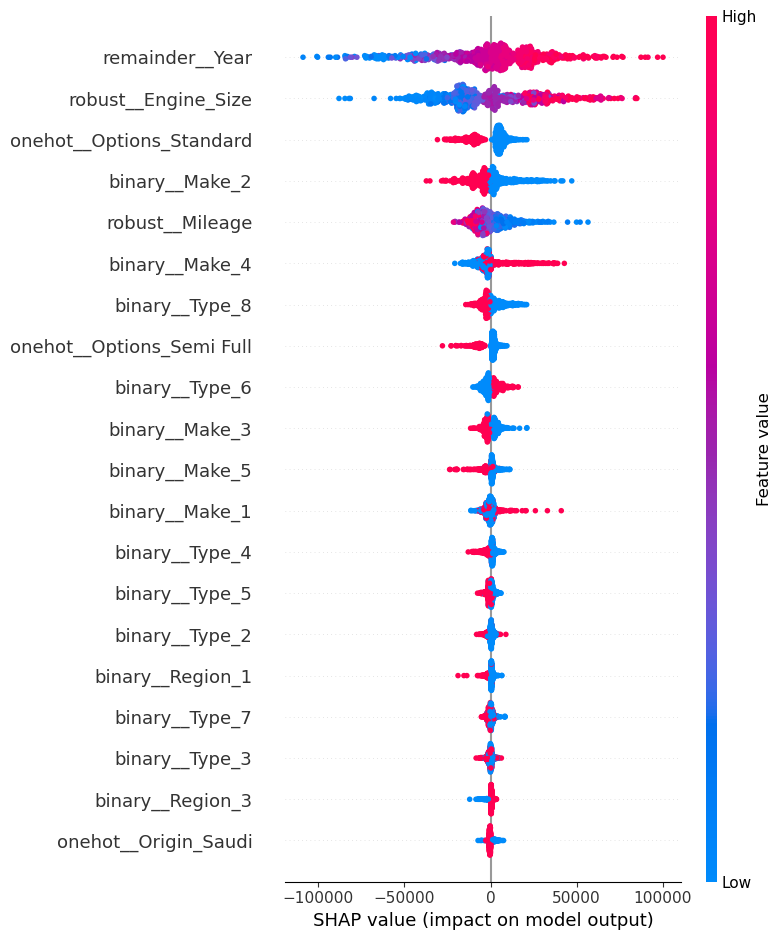

In [187]:
# SHAP explainer untuk XGBRegressor
explainer = shap.Explainer(best_model, X_test_transformed)
shap_values = explainer(X_test_transformed)

# Plot summary SHAP values
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names, plot_type="bar")
shap.summary_plot(shap_values, X_test_transformed, feature_names=feature_names)

**Grafik SHAP Feature Importance (bar plot)**
Insight:
- remainder__Year dan robust__Engine_Size mendominasi prediksi —> model sangat dipengaruhi oleh kolom Year dan Engine_Size.

**Grafik SHAP Summary Plot**
Warna:
Merah → nilai fitur tinggi.
Biru → nilai fitur rendah.

Arah pengaruh:
Titik di kanan → mendorong prediksi harga lebih tinggi.
Titik di kiri → mendorong prediksi harga lebih rendah.

Insight:
- Year punya pengaruh terbesar, semakin baru/semakin tinggi tahun mobilnya (nilai tinggi, merah), harga cenderung naik. Semakin lama/semakin rendah tahun mobilnya (nilai rendah, biru), harga cenderung turun.
- Engine_Size yang besar (merah) mendorong harga untuk naik. Engine_Size yang kecil (biru) menurunkan harga.
- onehot__Options_Standard: Jika kendaraan berfitur "Standard", cenderung akan menurunkan harga.
- Mileage: Mileage yang tinggi (merah) cenderung akan menurunkan harga. Mileage yang rendah (biru) cenderung akan mendorong harga naik.

## SHAP dependence plot pada 2 fitur teratas

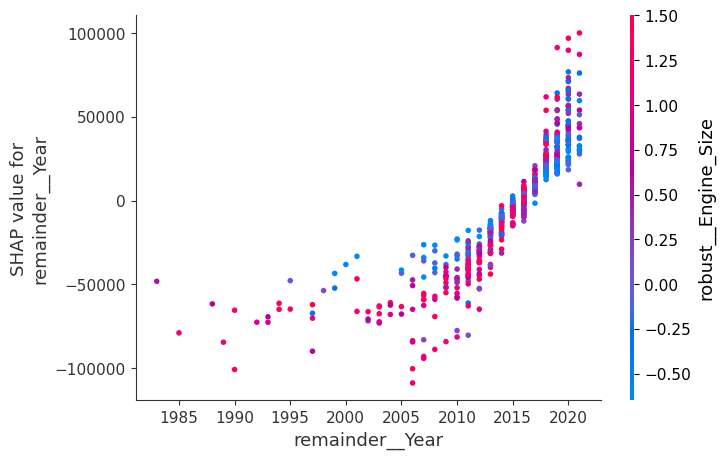

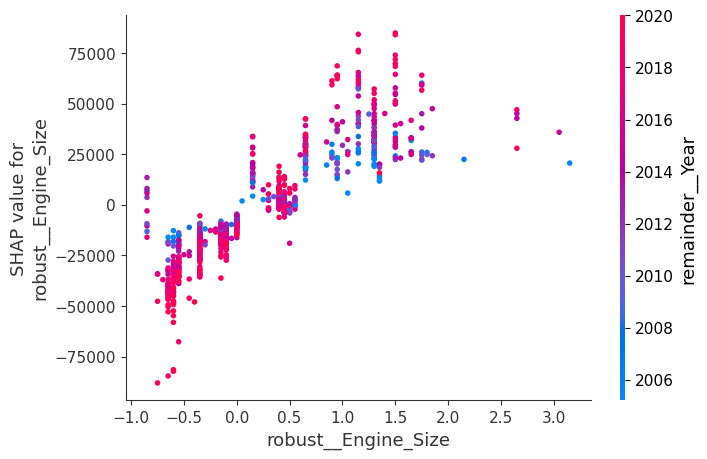

In [188]:
# Dependence plot untuk remainder__Year
shap.dependence_plot(
    "remainder__Year",
    shap_values.values,  # shap_values dari explainer(X_test_transformed)
    X_test_transformed,
    feature_names=feature_names
)

# Dependence plot untuk robust__Engine_Size
shap.dependence_plot(
    "robust__Engine_Size",
    shap_values.values,
    X_test_transformed,
    feature_names=feature_names
)

**Dependence Plot 1**
- Sumbu X = Tahun mobil (remainder__Year),
- Sumbu Y = SHAP value → besarnya pengaruh tahun mobil terhadap prediksi harga.
- Warna = Ukuran mesin (robust__Engine_Size).

Insight:
- Mobil yang lebih baru (tahun > 2010) cenderung menaikkan prediksi harga secara signifikan (SHAP value positif).
- Mobil yang lebih tua (tahun < 2000) cenderung menurunkan prediksi harga (SHAP value negatif).
- Warna merah (mesin besar) di bagian kanan grafik menunjukkan bahwa mobil baru dengan mesin besar memberikan efek kenaikan harga paling tinggi.
- Warna biru (mesin kecil) di tahun-tahun baru tetap memberi efek positif, tapi tidak sebesar mesin besar.

---

**Dependence Plot 2**
- Sumbu X = Ukuran mesin,
- Sumbu Y = SHAP value → pengaruh ukuran mesin terhadap prediksi harga.
- Warna = Tahun mobil (remainder__Year).

Insight:
- Mesin yang lebih besar (>1.0 pada skala robust) menaikkan prediksi harga.
- Mesin kecil (<0.5 pada skala robust) cenderung menurunkan harga.
- Mobil baru (warna merah) di bagian kanan atas grafik menunjukkan kombinasi mesin besar + mobil baru menghasilkan efek positif paling kuat.
- Mobil lama (warna biru) walaupun punya mesin besar, efeknya terhadap harga tetap positif tapi tidak sebesar mobil baru.

## Conclussion & Recommendation

1. Sebagian besar titik berkumpul di sekitar residual = 0, artinya prediksi model cukup akurat untuk banyak data.
2. Ada pola menyebar secara asimetris:
- Di nilai prediksi rendah (0–100000), residual masih cukup tersebar, namun cenderung simetris di atas dan bawah garis nol.
- Di nilai prediksi tinggi (>200000), ada outlier dengan residual sangat besar (baik positif maupun negatif). Ini mengindikasikan model kesulitan memprediksi harga sangat tinggi.

### Kesimpulan

1. Faktor-faktor utama yang memengaruhi harga mobil bekas di Arab Saudi
Berdasarkan analisis model XGBRegressor dan interpretasi SHAP Values, fitur-fitur seperti model tahun (year), jarak tempuh (mileage), merek mobil (brand), serta tipe transmisi memiliki pengaruh paling signifikan terhadap prediksi harga. Semakin baru tahun mobil dan semakin rendah jarak tempuh, harga cenderung lebih tinggi.

2. Kinerja model
- Model XGBRegressor yang digunakan menunjukkan performa prediksi yang cukup baik, Error prediksi (MAE/MSE/RMSE) relatif kecil, menunjukkan model cukup presisi dalam memprediksi harga pasar mobil bekas.

3. Validasi visual
- Residual plot menunjukkan persebaran residual yang cukup acak di sekitar garis nol untuk nilai prediksi rendah (0–100000), tetapi tidak jauh dari garis 0 yang berarti model cukup akurat. Tetapi ketika nilai prediksi tinggi (>200000), terdapat residual yang besar, yang mengindikasikan model kesulitan untuk memprediksi harga tinggi
- Distribusi SHAP Values mengonfirmasi konsistensi pengaruh fitur, di mana variabel terkait Year kendaraan dan Mileage selalu menjadi faktor utama.

### Rekomendasi

1. Untuk Penjual

- Fokus pada pemasaran kendaraan dengan Mileage rendah dan tahun produksi lebih baru atau tinggi, karena kedua faktor ini paling memengaruhi persepsi harga.
- Sertakan informasi lengkap dan akurat tentang transmisi, ukuran mesin, dan option kendaraan untuk meningkatkan kepercayaan pembeli dan membantu model untuk lebih akurat.

2. Untuk Platform Marketplace Mobil Bekas

- Gunakan model prediksi harga seperti yang dikembangkan di proyek ini untuk memberikan estimasi harga yang lebih adil dan transparan kepada penjual dan pembeli.
- Tambahkan filter pencarian yang mengutamakan faktor-faktor berpengaruh seperti tahun produksi dan jarak tempuh.

3. Untuk Pengembangan Model Selanjutnya

- Kumpulkan data tambahan seperti riwayat servis, kondisi eksterior-interior, jumlah kepemilikan, dan sebagainya sebelumnya yang mungkin dapat meningkatkan akurasi model.
- Lakukan tuning lebih lanjut pada hyperparameter XGBoost dan pertimbangkan model ansambel lain untuk perbandingan.
- Terapkan metode deteksi dan penanganan outlier yang lebih ketat untuk mengurangi error pada prediksi ekstrem.

## Save data yang sudah clean ke csv

In [189]:
df.to_csv('data_saudi_used_cars_Clean.csv')

## Save Model

In [190]:
import pickle

In [191]:
model_siap = model_final.fit(X, y)

In [192]:
pickle.dump(model_siap, open('model_final.sav', 'wb'))